### 研究問題
探索指定五校(淡江、中正、中山、南臺、義大)的交易與會員資料，並著重於分析紅利點數的收集與使用

### 分析結果
- 從整體的角度來看
    - 女性會員數多於男性
    - 較多人傾向兌換**門市取貨**的兌換券
    - 上線領取紅利點數的高峰位於九月，推測與開學有關  

  
- 從性別的角度來看各項數據
    - 因為種類過多，在此將券分為五類。除了其他以外，兩性傾向兌換**憑券抽**   
    - 原本資料的性別有0,1,2三種，想看這三類在領點的頻率有何差別，但女性與男性跟整體一致，都是九月為高峰，而其他誤填的資料則沒有差別。故在此以後，皆移除性別填為2的資料
    - 兩性消費品類最高的皆為設計、文具品類，再來則是教科書、社會書、生活百貨這三項
    - 門市消費頻率高峰皆為九、十月  

  
- 從兌換卷的角度來看各項數據
    - 傾向兌換而比例較高的學校是義守大學(0.25)，同時也是使用比例最高的(0.319)
    - 男女兌換比例較高的學校分別為義守與中正大學
    - 各校傾向兌換的券(最多數)
        - 中山:門市取貨
        - 中正:憑券抽
        - 淡江:門市取貨
        - 義守:憑券抽
        - 義守醫學:門市取貨
        - 南臺:憑券抽
    - 各校各類別兌換券使用比例
        - 中山:門市取貨(高達0.505)
        - 中正:憑券抽
        - 淡江:門市取貨
        - 義守:憑券抽
        - 義守醫學:門市取貨
        - 南臺:門市取貨 ->與上面傾向兌換券的結果不同，所以不一定傾向兌換哪類就會去使用
    - 年齡兌換人數最多的是18再來是19
    - 從學校再看兌換人數的年齡分佈哪個最高，除了義守為19歲以外，其他都是18歲
    - 兩性傾向兌換**憑券抽**與**門市取貨**  
  

- 從紅利點數角度看各項數據
    - 只有極少數的人領取過點數(0.039)
    - 各校領取月份高峰為九月，推測是推廣活動較多
    - 各校會員平均領取頻率最高為中正
    - 19歲領取點數較其他年齡層多
    - 從學校再看年齡的領取人數，最多都為19
  
- 從POS角度
    - 使用紅利折抵的比例為0.084，推測是大家並不知道可以使用紅利折抵，或是都拿去兌換券
    - 使用禮券折抵比例為0.016
    - 使用現金支付比例最高，為0.857
    - 在這段時間，這些消費屬於會員的比例為0.485，因為有會員不一定會報帳號紀錄累積點數，或是具有會員資格但不一定會到店消費，因為她可能是拿來領取點數或是兌換某類的券
    - 消費頻率高峰為九月
    - 消費總額最高大多為九月
    - 各校會員平均有0.12次(中正最高)消費會使用紅利折抵
    - 各校會員平均有0.035(中山最高)次消費會使用禮卷折抵
    - 年齡為30的會員，平均每人消費使用紅利折抵頻率為整體最高0.12
    - 會員消費頻率與兌換頻率間的關係為0.31，表示兩者的關聯性不高
    - 會員消費金額與兌換頻率間的關係為0.13，表示會員不會因為消費高就會特別兌換紅利來折抵，紅利的誘因並不高
    - 會員消費頻率與紅利領取頻率間的關係0.17，表示會員不會因為常去消費就上線領取紅利，也表示紅利的誘因並不高

### 分析後的一些想法
- 資料部分
    - 資料不符合格式->原本設計資料庫與前端的時候並沒有一個制式的填寫規定，所以資料有些都不符合格式
    - 種類太多，像是兌換卷的CouponCode的單一值就有好幾種，如果是大項的分類(例如10項)，就可以更明白大家在兌換上傾向哪些種類
    - 資料表的資料型態設定都不一樣，像是會員資料表中記錄手機號碼的型態是int64，但pos記錄中則是object

### Packages Import

In [372]:
# 基本函式
import pandas as pd
import os
import datetime

# 視覺化
import matplotlib.pyplot as plt
import seaborn as sns


# 設定視覺化的呈現方式
# 設定全域字體大小
plt.rcParams['axes.titlesize'] = 16  # 圖形標題的字體大小
plt.rcParams['axes.labelsize'] = 14  # X、Y軸標籤的字體大小
plt.rcParams['xtick.labelsize'] = 12  # X軸刻度標籤的字體大小
plt.rcParams['ytick.labelsize'] = 12  # Y軸刻度標籤的字體大小
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 適用中文字體顯示

### 資料處理

#### POS資料

In [373]:
# 設定資料夾路徑
folder_path = './raw_data'

# 找到所有 POS 檔案
pos_files = [file for file in os.listdir(folder_path) if 'POS' in file and file.endswith('.xlsx')]

# 初始化一個空的 DataFrame
all_pos = pd.DataFrame()

# 依序讀取並合併所有 Excel 檔案
for file in pos_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_excel(file_path)

    # 合併到總資料
    all_pos = pd.concat([all_pos, df], ignore_index=True)

# 儲存合併結果到 CSV 檔案
csv_path = os.path.join(folder_path, 'all_pos.csv')
all_pos.to_csv(csv_path, index=False, encoding='utf-8-sig')

In [374]:
all_pos = pd.read_csv('./raw_data/all_pos.csv')
all_pos.head()

,倉別名稱,客戶代號,單號,結帳日期,產品名稱,基本數量,類別名稱,實際銷貨價,實際銷售小計,已收現金,...,已退總額,刷卡金額,一卡通實付金額,LinePay實付金額,獲得紅利,退回紅利,紅利取用,紅利取用退回,抵用金額,促銷組合獲得紅利點數
0,中山,D00101,11001040006,110.01.04,monami螢光筆H601(黃),2,設計、文具,13.0,26,26,...,0,0,0,0,26,0,0,0,0,0
1,中山,D00101,11001040012,110.01.04,新歐亞大陸：面對消失的地理與國土疆界，世界該如何和平整合？,1,社會書,403.0,403,403,...,0,0,0,0,403,0,0,0,0,0
2,中山,D00101,11001040022,110.01.04,Todays雙杯環保飲料袋(棗紅 )-簡單生活#CZ-310A,1,穿搭配飾,99.0,99,99,...,0,0,0,0,99,0,0,0,0,0
3,中山,D00101,11001040039,110.01.04,OB-100 自動原子筆 0.7-藍,20,設計、文具,9.0,180,180,...,0,0,0,0,180,0,0,0,0,0
4,中山,D00101,11001040042,110.01.04,Pentel 自動螢光筆-藍 #SXS15-SO,1,設計、文具,34.0,34,124,...,0,0,0,0,124,0,0,0,0,0


In [472]:
#清理不是線上會員的資料
pos = all_pos[all_pos['客戶代號'].astype(str).str.len() >6]
pos

,倉別名稱,客戶代號,單號,結帳日期,產品名稱,基本數量,類別名稱,實際銷貨價,實際銷售小計,已收現金,...,已退總額,刷卡金額,一卡通實付金額,LinePay實付金額,獲得紅利,退回紅利,紅利取用,紅利取用退回,抵用金額,促銷組合獲得紅利點數
18,中山,D961360266,11001040090,110.01.04,Pentel 易拭型塑膠擦-小 #ZEL-05,2,設計、文具,10.0,20,84,...,0,0,0,0,84,0,0,0,0,0
19,中山,D961360266,11001040090,110.01.04,單面七彩索引片 17*26mm #WL-3066 華麗牌,1,設計、文具,12.0,12,84,...,0,0,0,0,84,0,0,0,0,0
20,中山,D961360266,11001040090,110.01.04,單面七彩索引片 17*42mm #WL-3065 華麗牌,1,設計、文具,12.0,12,84,...,0,0,0,0,84,0,0,0,0,0
21,中山,D961360266,11001040090,110.01.04,18K環保計算紙,2,設計、文具,20.0,40,84,...,0,0,0,0,84,0,0,0,0,0
22,中山,D963619834,11001040091,110.01.04,利百代LB5008CA工程計算機,1,設計、文具,199.0,199,199,...,0,0,0,0,199,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078898,義大,C905813630,11303201271,113.03.20,黃阿瑪的後宮生活 貓咪超有事3-貓貓美食救援計畫,1,社會書,264.0,264,0,...,0,264,0,0,264,0,0,0,0,0
1078903,義大,B958830134,11303201290,113.03.20,細版DIY26孔夾#JNC-05,1,設計、文具,36.0,36,58,...,0,0,0,0,58,0,0,0,0,0
1078904,義大,B958830134,11303201290,113.03.20,好好用26孔DIY/PP板,1,設計、文具,22.0,22,58,...,0,0,0,0,58,0,0,0,0,0
1078905,義大,B908879198,11303201296,113.03.20,Power BI 快速入門,1,教科書,441.0,441,441,...,0,0,0,0,441,0,0,0,0,0


#### 會員資料
- 拿掉不需要的欄位並清理不符合格式的資料
- 在UserSez的欄位，女生為1，男生為0

In [376]:
member = pd.read_csv('./raw_data/(APP-會員含生日)mem20240403.csv')
member = member.drop(columns=['MBR_SCHOOL_ID', 'UDF1','UDF4','Email','YahooID','ModifiedDate','UserName'])

In [377]:
member.head(10)

,MBR_SCHOOL,UserID,UserSex,Birthday,CreatedDate
0,國立中山大學,919061387,0,1999-01-06,2021-01-19 11:22:21.413
1,國立中山大學,916360484,1,2021-01-27,2021-01-27 17:52:00.263
2,國立中山大學,983835662,1,1987-10-10,2021-02-03 12:44:43.760
3,國立中山大學,979872208,0,2010-09-26,2021-02-20 14:01:19.887
4,國立中山大學,979136556,0,2001-01-07,2021-02-20 15:35:45.860
5,國立中山大學,972929764,1,2001-02-10,2021-02-22 09:54:22.587
6,國立中山大學,909518059,0,1999-10-04,2021-02-23 14:01:13.393
7,國立中山大學,938662601,0,2000-01-30,2021-02-24 12:38:11.003
8,國立中山大學,972981181,0,1980-10-31,2021-02-25 11:22:19.980
9,國立中山大學,981133515,1,1999-12-02,2021-02-25 12:03:30.850


#### 紅利點數領取資料
- 拿掉不需要的欄位並清理不符合格式的資料
- 以這部分的UserSex來說，女生為1，男生為0

In [378]:
point = pd.read_csv('./raw_data/(APP-會員點數)_point.csv')
point = point.drop(columns=['UserName', 'MBR_SCHOOL_ID', 'UDF1','UDF4','Email','YahooID'])

C:\Users\Shelly\AppData\Local\Temp\ipykernel_28208\1541841900.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  point = pd.read_csv('./raw_data/(APP-會員點數)_point.csv')


In [379]:
point

,MBR_SCHOOL,UserID,UserSex,Point,Remark,CreatedDate,Year,Month,Day
0,國立中山大學,900022037,0,3.0,天天上APP，天天簽到送點數，恭喜獲得,2022-03-08 12:58:36.970,2022.0,3.0,8.0
1,國立中山大學,900022037,0,3.0,天天上APP，天天簽到送點數，恭喜獲得,2022-03-09 17:13:00.143,2022.0,3.0,9.0
2,國立中山大學,900022037,0,3.0,天天上APP，天天簽到送點數，恭喜獲得,2022-03-10 12:36:15.573,2022.0,3.0,10.0
3,國立中山大學,900022037,0,3.0,天天上APP，天天簽到送點數，恭喜獲得,2022-03-11 13:31:43.613,2022.0,3.0,11.0
4,國立中山大學,900022037,0,15.0,天天上APP，週末簽到送點數，恭喜獲得,2022-03-12 13:09:25.557,2022.0,3.0,12.0
...,...,...,...,...,...,...,...,...,...
355949,義守大學(醫學院分部),971236397,2,30.0,天天上APP，週末簽到送點數，恭喜獲得,2023-09-20 15:08:53.810,2023.0,9.0,20.0
355950,義守大學(醫學院分部),971236397,2,30.0,天天上APP，週末簽到送點數，恭喜獲得,2023-09-27 15:26:36.657,2023.0,9.0,27.0
355951,義守大學(醫學院分部),971236397,2,5.0,周一不blue，恭喜獲得,2024-01-22 15:04:05.693,2024.0,1.0,22.0
355952,義守大學(醫學院分部),971236397,2,10.0,收心囉，恭喜獲得,2024-02-20 15:46:50.147,2024.0,2.0,20.0


In [380]:
# 檢查資料初步清理的結果
point.head(10)

,MBR_SCHOOL,UserID,UserSex,Point,Remark,CreatedDate,Year,Month,Day
0,國立中山大學,900022037,0,3.0,天天上APP，天天簽到送點數，恭喜獲得,2022-03-08 12:58:36.970,2022.0,3.0,8.0
1,國立中山大學,900022037,0,3.0,天天上APP，天天簽到送點數，恭喜獲得,2022-03-09 17:13:00.143,2022.0,3.0,9.0
2,國立中山大學,900022037,0,3.0,天天上APP，天天簽到送點數，恭喜獲得,2022-03-10 12:36:15.573,2022.0,3.0,10.0
3,國立中山大學,900022037,0,3.0,天天上APP，天天簽到送點數，恭喜獲得,2022-03-11 13:31:43.613,2022.0,3.0,11.0
4,國立中山大學,900022037,0,15.0,天天上APP，週末簽到送點數，恭喜獲得,2022-03-12 13:09:25.557,2022.0,3.0,12.0
5,國立中山大學,900022037,0,20.0,白色情人節限定！登入簽到點數增加，恭喜獲得,2022-03-16 12:39:06.433,2022.0,3.0,16.0
6,國立中山大學,900022037,0,20.0,白色情人節限定！登入簽到點數增加，恭喜獲得,2022-03-17 13:16:21.003,2022.0,3.0,17.0
7,國立中山大學,900022037,0,56.0,XW16473714 發票補登,2022-03-18 13:35:00.123,2022.0,3.0,18.0
8,國立中山大學,900022037,0,3.0,天天上APP，天天簽到送點數，恭喜獲得,2022-03-22 10:52:05.680,2022.0,3.0,22.0
9,國立中山大學,900022037,0,15.0,天天上APP，週末簽到送點數，恭喜獲得,2022-03-26 12:18:07.473,2022.0,3.0,26.0


#### 兌換券使用資料

In [381]:
coupon = pd.read_csv('./raw_data/(APP-點數兌換)_coupon.csv')
coupon = coupon.drop(columns=['MBR_SCHOOL_ID','UserName','UDF1','UDF4','Email','YahooID','CouponCode'])
coupon = coupon.rename(columns={'PointDate': 'CouponDate'})

In [382]:
# 檢視初步整理的資料結果
coupon.head(10)

,MBR_SCHOOL,UserID,UserSex,CouponDate,Name,Amount,IsUsed,AssignDate,ExpireDate
0,國立中山大學,900761212,1,2022-06-18 00:11:47.480,【門市取貨】UNI 限定版小小兵摩樂筆（款式隨機）,10,1,2022-06-18 12:30:18.557,2022-09-06 17:33:09.253
1,國立中山大學,900761212,1,2021-12-30 08:13:27.313,【門市取貨】熊熊捲線器,8,1,2021-12-30 12:16:07.930,2022-01-14 12:09:24.993
2,國立中山大學,902166568,0,2022-09-08 10:38:43.263,【門市獨家活動】（09/06上架）開學折抵金 5元,500,1,2022-09-08 10:40:06.090,2022-09-13 10:46:22.500
3,國立中山大學,902329869,0,2021-10-26 12:03:43.003,【會員大好康】100點免費抽(舒適生活空氣清淨機抽獎卷5),200,1,2021-10-26 12:26:32.220,2021-10-26 12:26:52.127
4,國立中山大學,903483681,0,2022-02-23 14:42:58.923,【門市專用】50元消費折抵金（2022/02）,100,1,2022-02-23 15:52:01.177,2022-02-23 15:52:12.777
5,國立中山大學,905058890,0,2023-08-23 23:35:19.783,【門市取貨】時報精選-一次讀懂經濟學經典,1,1,2023-08-23 23:37:59.643,2023-09-01 15:01:35.040
6,國立中山大學,905058890,0,2023-08-23 23:35:19.783,【門市取貨】時報精選-一次讀懂政治學經典,1,1,2023-08-23 23:38:41.363,2023-09-01 15:02:30.760
7,國立中山大學,905058890,0,2023-08-23 23:35:19.783,【門市取貨】時報精選-一次讀懂商業經典,1,1,2023-08-23 23:38:16.317,2023-09-01 15:01:25.120
8,國立中山大學,905058890,0,2023-08-23 23:35:19.783,【門市取貨】時報精選-一次讀懂自我成長經典,1,1,2023-08-23 23:38:28.580,2023-09-01 15:01:44.260
9,國立中山大學,905058890,0,2023-05-23 17:24:55.607,【門市取貨】魔芋爽(3入1組)-合法進口商販售,10,1,2023-05-23 17:26:06.387,2023-05-30 16:33:31.477


### 整體的資料視覺化

##### 會員男女比例

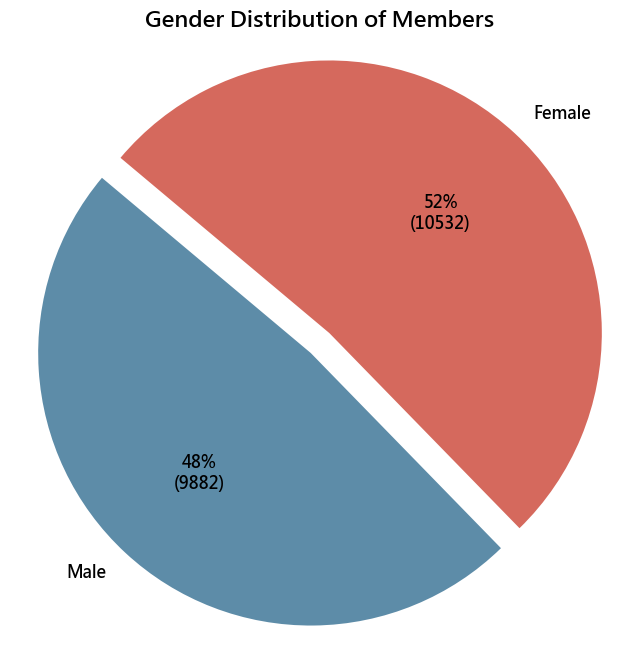

In [383]:
# 計算會員的性別數
gender_counts = member['UserSex'].value_counts()

# 提取男女數量
male_count = gender_counts.get(0, 0)  # 男性編碼為 0
female_count = gender_counts.get(1, 0)  # 女性編碼為 1

# 繪製圓餅圖
labels = ['Male', 'Female']
sizes = [male_count, female_count]
colors = ["#5d8ca8", "#d5695d"]
explode = (0.1, 0)  # 突出顯示男性

plt.figure(figsize=(8, 8))
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] #使中文能正常顯示
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=lambda pct: '{:.0f}%\n({:.0f})'.format(pct, pct/100*sum(gender_counts)), startangle=140, textprops={'fontsize': 12})
plt.axis('equal')  # 保持圓形
plt.title('Gender Distribution of Members', fontsize = 16, fontweight = 'bold')
plt.show()


##### 兌換券的各類兌換比例

In [384]:
coupon['Name'] = coupon['Name'].str.extract(r'【(.*?)】')
coupon.head()

,MBR_SCHOOL,UserID,UserSex,CouponDate,Name,Amount,IsUsed,AssignDate,ExpireDate
0,國立中山大學,900761212,1,2022-06-18 00:11:47.480,門市取貨,10,1,2022-06-18 12:30:18.557,2022-09-06 17:33:09.253
1,國立中山大學,900761212,1,2021-12-30 08:13:27.313,門市取貨,8,1,2021-12-30 12:16:07.930,2022-01-14 12:09:24.993
2,國立中山大學,902166568,0,2022-09-08 10:38:43.263,門市獨家活動,500,1,2022-09-08 10:40:06.090,2022-09-13 10:46:22.500
3,國立中山大學,902329869,0,2021-10-26 12:03:43.003,會員大好康,200,1,2021-10-26 12:26:32.220,2021-10-26 12:26:52.127
4,國立中山大學,903483681,0,2022-02-23 14:42:58.923,門市專用,100,1,2022-02-23 15:52:01.177,2022-02-23 15:52:12.777


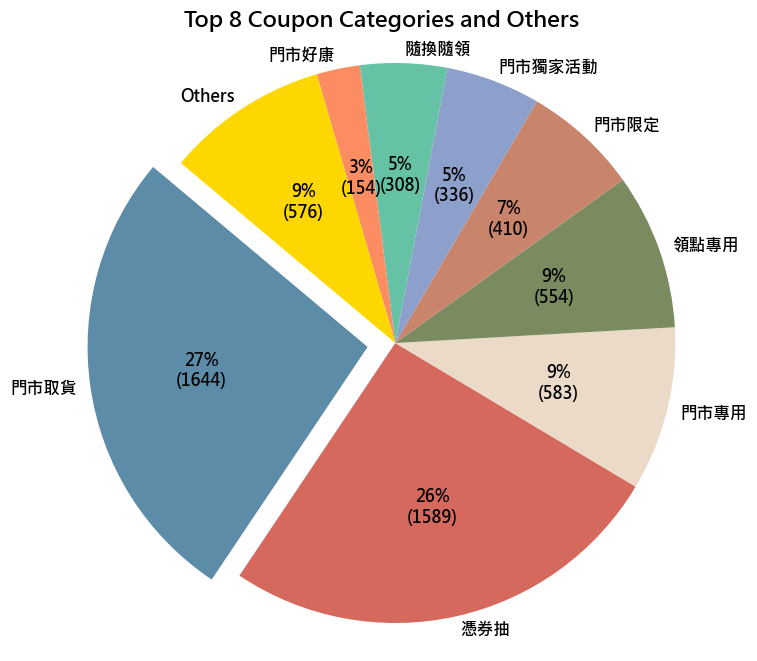

In [385]:
# 計算每種兌換券的數量
coupon_category = coupon['Name'].value_counts()

# 取出前 8 名類別，其餘歸類為 "Others"
top_categories = coupon_category[:8]
other_count = coupon_category[8:].sum()
categories = list(top_categories.index) + ['Others']
counts = list(top_categories.values) + [other_count]

# 定義顏色和圓餅圖屬性
colors = ["#5d8ca8", "#d5695d", "#EBDAC8", "#7b8b60", "#c8856b", "#8da0cb", "#66c2a5", "#fc8d62", "#FFD700"]
explode = [0.1] + [0] * 8

# 繪製圓餅圖
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, colors=colors, explode=explode, 
        autopct=lambda pct: '{:.0f}%\n({:.0f})'.format(pct, pct / 100 * sum(counts)),
        startangle=140, textprops={'fontsize': 12}, labeldistance=1.05)

plt.title('Top 8 Coupon Categories and Others', fontsize=16, fontweight = 'bold')
plt.axis('equal')  # 確保圓形比例
plt.show()


##### 會員上線累點頻率
- 依年、12個月分計算上線領點的情況，瞭解哪一個月份比較多人領點
- 時間涵蓋2020/11到2023/9
- 分析後可以發現到九月為領點高峰，推測與開學有關，申辦帳號人數增加

In [386]:
#把Remark欄位為空值的資料拿掉
point.dropna(subset=['Remark'], inplace=True)

#把CreatedDate轉成時間型態
point['CreatedDate'] = pd.to_datetime(point['CreatedDate'])
point['Year'] = point['CreatedDate'].dt.year
point['Month'] = point['CreatedDate'].dt.month
point['Day'] = point['CreatedDate'].dt.date

#篩選出含有簽到字詞的資料
signin_data = point[point['Remark'].str.contains('簽到')]

In [387]:
# Group by year and count occurrences of each month
point_feq = signin_data.groupby('Year')['Month'].value_counts().sort_index().reset_index()
point_feq.head(10)

,Year,Month,count
0,2020,11,50
1,2020,12,101
2,2021,1,120
3,2021,2,44
4,2021,3,57
5,2021,4,290
6,2021,5,340
7,2021,6,303
8,2021,7,326
9,2021,8,669


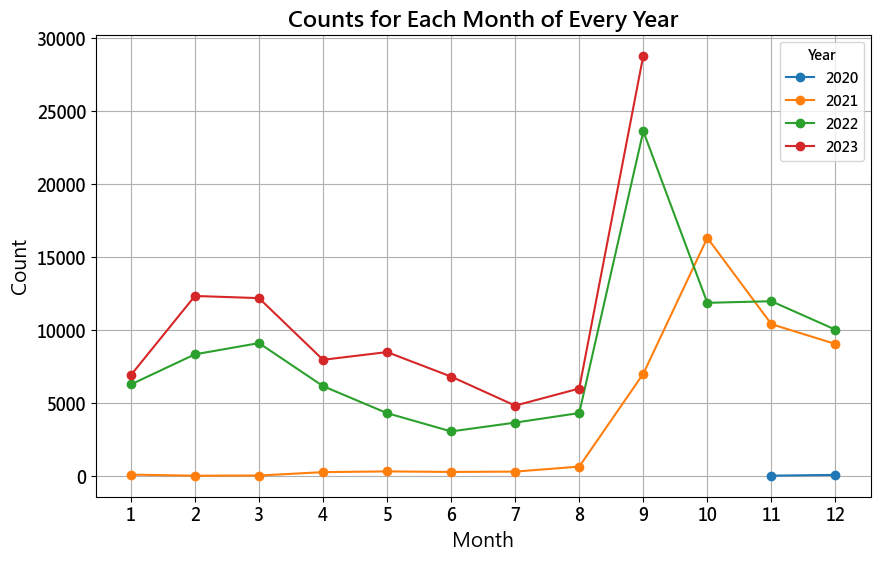

In [388]:
# 年份劃分
years = point_feq['Year'].unique()

# 繪製折線圖
plt.figure(figsize=(10, 6))

for year in years:
    year_data = point_feq[point_feq['Year'] == year]
    plt.plot(year_data['Month'], year_data['count'], marker='o', label=year)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Counts for Each Month of Every Year',fontsize = 16, fontweight = 'bold')
plt.xticks(range(1, 13))  
plt.legend(title='Year')

plt.grid(True)
plt.show()

### 依性別的角度看各類數據

##### 各類兌換券 VS 會員性別

In [389]:
coupon.head(10)

,MBR_SCHOOL,UserID,UserSex,CouponDate,Name,Amount,IsUsed,AssignDate,ExpireDate
0,國立中山大學,900761212,1,2022-06-18 00:11:47.480,門市取貨,10,1,2022-06-18 12:30:18.557,2022-09-06 17:33:09.253
1,國立中山大學,900761212,1,2021-12-30 08:13:27.313,門市取貨,8,1,2021-12-30 12:16:07.930,2022-01-14 12:09:24.993
2,國立中山大學,902166568,0,2022-09-08 10:38:43.263,門市獨家活動,500,1,2022-09-08 10:40:06.090,2022-09-13 10:46:22.500
3,國立中山大學,902329869,0,2021-10-26 12:03:43.003,會員大好康,200,1,2021-10-26 12:26:32.220,2021-10-26 12:26:52.127
4,國立中山大學,903483681,0,2022-02-23 14:42:58.923,門市專用,100,1,2022-02-23 15:52:01.177,2022-02-23 15:52:12.777
5,國立中山大學,905058890,0,2023-08-23 23:35:19.783,門市取貨,1,1,2023-08-23 23:37:59.643,2023-09-01 15:01:35.040
6,國立中山大學,905058890,0,2023-08-23 23:35:19.783,門市取貨,1,1,2023-08-23 23:38:41.363,2023-09-01 15:02:30.760
7,國立中山大學,905058890,0,2023-08-23 23:35:19.783,門市取貨,1,1,2023-08-23 23:38:16.317,2023-09-01 15:01:25.120
8,國立中山大學,905058890,0,2023-08-23 23:35:19.783,門市取貨,1,1,2023-08-23 23:38:28.580,2023-09-01 15:01:44.260
9,國立中山大學,905058890,0,2023-05-23 17:24:55.607,門市取貨,10,1,2023-05-23 17:26:06.387,2023-05-30 16:33:31.477


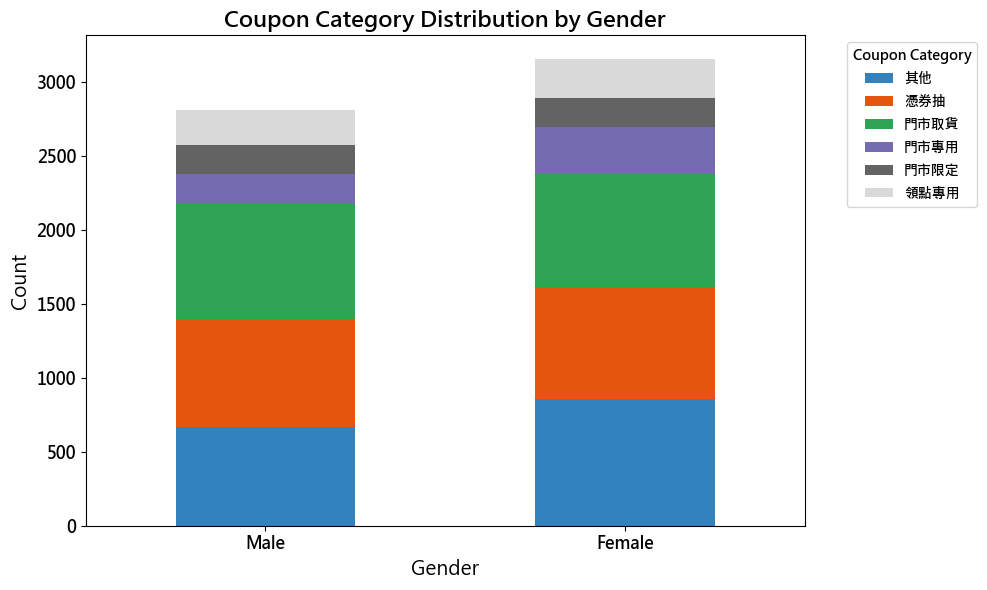

In [390]:
# 白除
filtered_coupon = coupon[coupon['UserSex'] != 2].copy()

# 取得前 5 大兌換券類別
top_5_coupons = filtered_coupon['Name'].value_counts().head(5).index

# 將其他類別歸為 "其他"
filtered_coupon['Category'] = filtered_coupon['Name'].apply(lambda x: x if x in top_5_coupons else '其他')

# 計算分組資料
grouped_data = filtered_coupon.groupby(['UserSex', 'Category']).size().unstack(fill_value=0)

# 繪製圖形
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, ax=ax, colormap='tab20c')

# 圖形標籤與樣式
plt.title('Coupon Category Distribution by Gender', fontweight = 'bold', fontsize = 16)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.legend(title='Coupon Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### App累點頻率 VS 會員性別
- 這裡原本要排除其他性別的資料，但後來決定不妨可以看女性、男性、其他這三種在累積點數上有沒有什麼比較不一樣的地方，最後分析結果則是沒有
- 但從這裡也可以觀察到9月是屬於領取點數的高峰  

**備註: 因為後來在性別並沒有看到2這類的會員有什麼特別的趨勢，所以後來的分析項目皆移除性別為2的資料**

In [391]:
point_gender = signin_data.groupby('Month')['UserSex'].value_counts().sort_index().reset_index()
point_gender.head()

,Month,UserSex,count
0,1,0,5180
1,1,1,7340
2,1,2,824
3,2,0,8746
4,2,1,10787


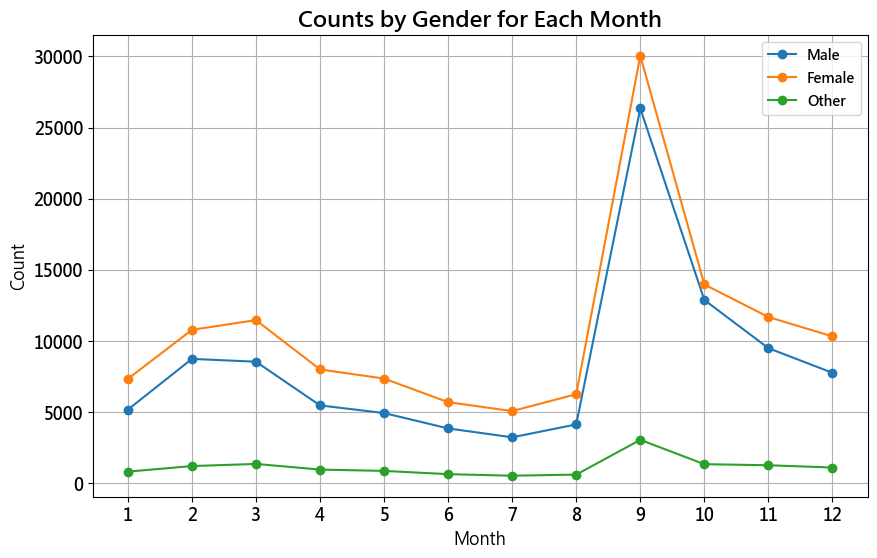

In [392]:
# Create a dictionary to map UserSex values to labels
sex_labels = {0: 'Male', 1: 'Female', 2: 'Other'}

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over each unique value of 'UserSex'
for sex in point_gender['UserSex'].unique():
    # Filter data for the current 'UserSex'
    sex_data = point_gender[point_gender['UserSex'] == sex]
    # Plot the data
    plt.plot(sex_data['Month'], sex_data['count'], marker='o', label=sex_labels[sex])

# Adding labels and title
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Counts by Gender for Each Month',fontsize = 16,fontweight = 'bold')
plt.xticks(point_gender['Month'].unique())  # Set ticks for each unique month
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

##### 消費品類 VS 會員性別
- 篩掉不屬於消費定義的類別名稱

In [393]:
fall_pos = all_pos[~all_pos['類別名稱'].isin(['不計算業績', '業外', 'X[麗文禮券.]','促銷代碼'])]
fall_pos.head()

,倉別名稱,客戶代號,單號,結帳日期,產品名稱,基本數量,類別名稱,實際銷貨價,實際銷售小計,已收現金,...,已退總額,刷卡金額,一卡通實付金額,LinePay實付金額,獲得紅利,退回紅利,紅利取用,紅利取用退回,抵用金額,促銷組合獲得紅利點數
0,中山,D00101,11001040006,110.01.04,monami螢光筆H601(黃),2,設計、文具,13.0,26,26,...,0,0,0,0,26,0,0,0,0,0
1,中山,D00101,11001040012,110.01.04,新歐亞大陸：面對消失的地理與國土疆界，世界該如何和平整合？,1,社會書,403.0,403,403,...,0,0,0,0,403,0,0,0,0,0
2,中山,D00101,11001040022,110.01.04,Todays雙杯環保飲料袋(棗紅 )-簡單生活#CZ-310A,1,穿搭配飾,99.0,99,99,...,0,0,0,0,99,0,0,0,0,0
3,中山,D00101,11001040039,110.01.04,OB-100 自動原子筆 0.7-藍,20,設計、文具,9.0,180,180,...,0,0,0,0,180,0,0,0,0,0
4,中山,D00101,11001040042,110.01.04,Pentel 自動螢光筆-藍 #SXS15-SO,1,設計、文具,34.0,34,124,...,0,0,0,0,124,0,0,0,0,0


- 篩掉不是學生身分的客戶代號
    - 判斷標準為購買品項，如果是教職人員的話通常是少於10字數的代號，且一次購買的品項較多且大量

In [394]:
fall_pos = fall_pos[fall_pos['客戶代號'].astype(str).apply(len)==10]
fall_pos.head()

,倉別名稱,客戶代號,單號,結帳日期,產品名稱,基本數量,類別名稱,實際銷貨價,實際銷售小計,已收現金,...,已退總額,刷卡金額,一卡通實付金額,LinePay實付金額,獲得紅利,退回紅利,紅利取用,紅利取用退回,抵用金額,促銷組合獲得紅利點數
18,中山,D961360266,11001040090,110.01.04,Pentel 易拭型塑膠擦-小 #ZEL-05,2,設計、文具,10.0,20,84,...,0,0,0,0,84,0,0,0,0,0
19,中山,D961360266,11001040090,110.01.04,單面七彩索引片 17*26mm #WL-3066 華麗牌,1,設計、文具,12.0,12,84,...,0,0,0,0,84,0,0,0,0,0
20,中山,D961360266,11001040090,110.01.04,單面七彩索引片 17*42mm #WL-3065 華麗牌,1,設計、文具,12.0,12,84,...,0,0,0,0,84,0,0,0,0,0
21,中山,D961360266,11001040090,110.01.04,18K環保計算紙,2,設計、文具,20.0,40,84,...,0,0,0,0,84,0,0,0,0,0
22,中山,D963619834,11001040091,110.01.04,利百代LB5008CA工程計算機,1,設計、文具,199.0,199,199,...,0,0,0,0,199,0,0,0,0,0


- 從客戶代號中取字母後9個數字，代表此顧客的手機號碼，並存成新欄位「新顧客代號」，要用來與其他的資料表合併以取地性別的資料

In [395]:
fall_pos['新客戶代號'] = fall_pos['客戶代號'].str.extract('(\d+)')
fall_pos.head()

,倉別名稱,客戶代號,單號,結帳日期,產品名稱,基本數量,類別名稱,實際銷貨價,實際銷售小計,已收現金,...,刷卡金額,一卡通實付金額,LinePay實付金額,獲得紅利,退回紅利,紅利取用,紅利取用退回,抵用金額,促銷組合獲得紅利點數,新客戶代號
18,中山,D961360266,11001040090,110.01.04,Pentel 易拭型塑膠擦-小 #ZEL-05,2,設計、文具,10.0,20,84,...,0,0,0,84,0,0,0,0,0,961360266
19,中山,D961360266,11001040090,110.01.04,單面七彩索引片 17*26mm #WL-3066 華麗牌,1,設計、文具,12.0,12,84,...,0,0,0,84,0,0,0,0,0,961360266
20,中山,D961360266,11001040090,110.01.04,單面七彩索引片 17*42mm #WL-3065 華麗牌,1,設計、文具,12.0,12,84,...,0,0,0,84,0,0,0,0,0,961360266
21,中山,D961360266,11001040090,110.01.04,18K環保計算紙,2,設計、文具,20.0,40,84,...,0,0,0,84,0,0,0,0,0,961360266
22,中山,D963619834,11001040091,110.01.04,利百代LB5008CA工程計算機,1,設計、文具,199.0,199,199,...,0,0,0,199,0,0,0,0,0,963619834


- 與「會員」的資料表合併

In [396]:
# 先將兩個欄位的型態都轉成int64
fall_pos['新客戶代號'] = fall_pos['新客戶代號'].astype(str)
member['UserID'] = member['UserID'].astype(str)

In [397]:
pos_member = pd.merge(fall_pos, member, left_on='新客戶代號', right_on='UserID', how='inner')

- 篩鰾性別被記錄為2的資料，因為這裡2算是誤填

In [398]:
pos_member = pos_member[pos_member['UserSex'] != 2]

- 備註看起來不太像消費的品類
    - 藍海經銷:教科書如資料結構、唐詩三百首等等 
    - 可諾進出口:如英文教科書American Headway 3/e Student Book 3

In [399]:
# 將類別與性別分組並計算數量
category_counts = pd.DataFrame(pos_member.groupby(['類別名稱','UserSex'])['基本數量'].sum())
category_counts

基本數量
類別名稱   UserSex       
3C     0         3795
       1         2982
二手書    0           43
       1           28
其他     0         1362
       1          843
可諾進出口  0          212
       1          255
學校紀念品  0         3002
       1         1743
教科書    0        15810
       1        15949
生活百貨   0         5964
       1         6493
社會書    0         7257
       1         8061
穿搭配飾   0          238
       1          498
簡體字書   0           82
       1           35
美妝     0            5
       1           11
藍海經銷   0          525
       1          592
蘋果原廠產品 0          161
       1          115
設計、文具  0        52401
       1        71089
食品     0          260
       1          228

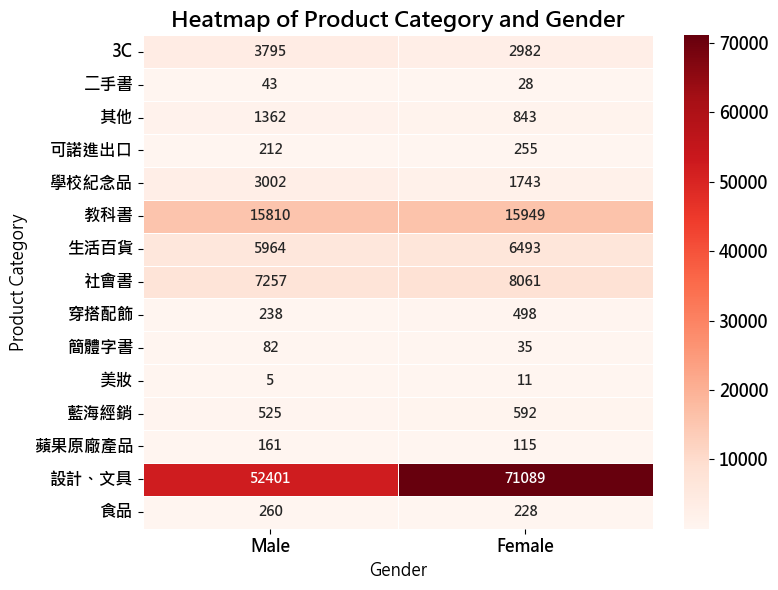

In [400]:
# 重新整理資料以符合熱圖格式
hp_category_gender = category_counts.reset_index().pivot(
    index='類別名稱', 
    columns='UserSex', 
    values='基本數量'
)

# 熱圖呈現
plt.figure(figsize=(8, 6))
sns.heatmap(hp_category_gender, cmap='Reds', annot=True, fmt='d', linewidths=0.5) # fmt 控制 annot = True顯示的數字格式

plt.title('Heatmap of Product Category and Gender', fontsize = 16, fontweight = 'bold')
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Product Category', fontsize = 12)
plt.xticks(ticks=[0.5, 1.5], labels=['Male', 'Female'], rotation=0)  # 調整 X 軸標籤
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### 會員門市消費頻率 VS 會員性別

- 把欄位中的民國轉為西元

In [401]:
# 定義轉換函數
def to_datetime(taiwan_date):
    year_offset = 1911
    parts = taiwan_date.split('.')
    year = int(parts[0]) + year_offset
    month = int(parts[1])
    day = int(parts[2])

    # 使用 datetime 將日期數據解析成日期對象
    date_obj = datetime.datetime(year, month, day)

    return date_obj

# 將函數應用到整個欄位
pos_member.loc[:, '新結帳日期'] = pos_member['結帳日期'].apply(to_datetime)

In [402]:
# 擷取新的
pos_member.loc[:, 'Year'] = pos_member['新結帳日期'].dt.year
pos_member.loc[:, 'Month'] = pos_member['新結帳日期'].dt.month

- 計算各用戶的消費的頻率

In [403]:
user_frequency = pos_member.groupby(['UserID', 'Year','Month']).size().reset_index(name='Counts')
user_frequency

,UserID,Year,Month,Counts
0,900008283,2023,9,2
1,900008283,2023,10,10
2,900008283,2023,12,5
3,900008283,2024,2,1
4,900008283,2024,3,4
...,...,...,...,...
51781,989986908,2023,2,1
51782,989986908,2023,10,1
51783,989986908,2024,2,1
51784,989991647,2023,11,2


In [404]:
# 將結果根據 UserID 和 UserSex 進行分組，並計算每個性別的每個月份消費次數總和
user_frequency = user_frequency.merge(pos_member[['UserID', 'UserSex']], on='UserID')

In [405]:
user_frequency

,UserID,Year,Month,Counts,UserSex
0,900008283,2023,9,2,1
1,900008283,2023,9,2,1
2,900008283,2023,9,2,1
3,900008283,2023,9,2,1
4,900008283,2023,9,2,1
...,...,...,...,...,...
1091153,989991647,2023,11,2,0
1091154,989991647,2023,12,2,0
1091155,989991647,2023,12,2,0
1091156,989991647,2023,12,2,0


- 依照上面分組結果可以發現會有重複的記錄，故在這裡刪除

In [406]:
user_frequency = user_frequency.drop_duplicates(subset=['UserID', 'Year', 'Month'])

In [407]:
gender_frequency = user_frequency.groupby(['UserSex', 'Year', 'Month']).agg({'Counts': 'sum'}).reset_index()

In [408]:
gender_frequency

,UserSex,Year,Month,Counts
0,0,2021,1,31
1,0,2021,2,39
2,0,2021,3,78
3,0,2021,4,44
4,0,2021,5,91
...,...,...,...,...
73,1,2023,11,3532
74,1,2023,12,5532
75,1,2024,1,1727
76,1,2024,2,4184


In [409]:
sex_labels = {0: '男', 1: '女', 2: '未知'}

for sex in gender_frequency['UserSex'].unique():
    data = gender_frequency[gender_frequency['UserSex'] == sex]
    unique_users = data.groupby('Month')['Counts'].unique()  # 計算每月份的唯一使用者數量

    # Print the number of users for each gender and month
    print(f"Gender: {sex_labels[sex]}")
    print(unique_users.to_string())

Gender: 男
Month
1       [31, 897, 420, 1281]
2     [39, 1903, 2245, 3655]
3     [78, 1999, 2457, 3531]
4           [44, 1445, 1342]
5            [91, 692, 1461]
6            [23, 384, 1155]
7               [9, 90, 170]
8             [48, 252, 198]
9         [1074, 7693, 6406]
10        [4826, 4019, 3150]
11        [2882, 3155, 2619]
12        [1899, 2790, 3864]
Gender: 女
Month
1       [23, 1302, 616, 1727]
2      [35, 1849, 2387, 4184]
3     [136, 2720, 2906, 4264]
4           [134, 1795, 1700]
5            [31, 1112, 2213]
6             [30, 433, 1601]
7              [20, 183, 159]
8              [68, 325, 211]
9          [1015, 8136, 7696]
10         [4326, 4434, 3861]
11         [3494, 4306, 3532]
12         [2559, 4159, 5532]


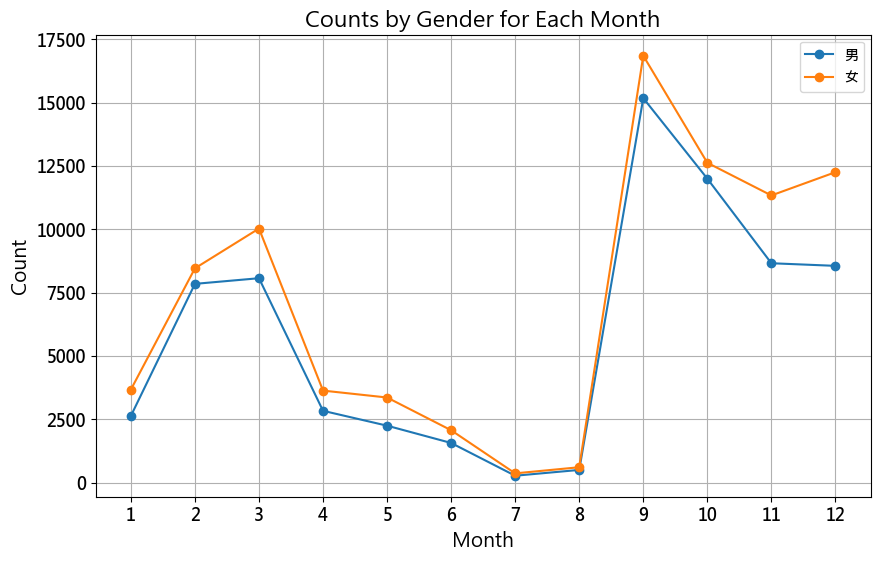

In [410]:
plt.figure(figsize=(10, 6))

sex_labels = {0: '男', 1: '女'}

for sex in gender_frequency['UserSex'].unique():
    data = gender_frequency[gender_frequency['UserSex'] == sex]
    total_counts = data.groupby('Month')['Counts'].sum()  # 計算每月份的總消費次數
    plt.plot(total_counts.index, total_counts.values, label=sex_labels[sex], marker='o')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Counts by Gender for Each Month')
plt.xticks(gender_frequency['Month'].unique())  # Set ticks for each unique month
plt.legend()
plt.grid(True)
plt.show()

### 依兌換券角度

##### 各會員的兌換頻率

In [411]:
coupon

,MBR_SCHOOL,UserID,UserSex,CouponDate,Name,Amount,IsUsed,AssignDate,ExpireDate
0,國立中山大學,900761212,1,2022-06-18 00:11:47.480,門市取貨,10,1,2022-06-18 12:30:18.557,2022-09-06 17:33:09.253
1,國立中山大學,900761212,1,2021-12-30 08:13:27.313,門市取貨,8,1,2021-12-30 12:16:07.930,2022-01-14 12:09:24.993
2,國立中山大學,902166568,0,2022-09-08 10:38:43.263,門市獨家活動,500,1,2022-09-08 10:40:06.090,2022-09-13 10:46:22.500
3,國立中山大學,902329869,0,2021-10-26 12:03:43.003,會員大好康,200,1,2021-10-26 12:26:32.220,2021-10-26 12:26:52.127
4,國立中山大學,903483681,0,2022-02-23 14:42:58.923,門市專用,100,1,2022-02-23 15:52:01.177,2022-02-23 15:52:12.777
...,...,...,...,...,...,...,...,...,...
6402,義守大學(醫學院分部),988634590,1,2023-09-21 17:29:16.567,門市取貨,6240,1,2023-09-21 17:30:15.067,2023-09-21 17:31:02.223
6403,義守大學(醫學院分部),988763076,1,2023-09-07 11:39:33.283,義守大學專屬,100,1,2023-09-07 11:41:32.440,2023-09-07 11:41:39.220
6404,義守大學(醫學院分部),988763076,1,2023-09-07 11:39:33.283,門市取貨,6240,1,2023-09-07 11:41:02.440,2023-09-07 11:41:07.827
6405,義守大學(醫學院分部),988964113,1,2023-09-21 12:43:57.207,門市取貨,6240,1,2023-09-21 12:44:41.880,2023-09-21 12:44:48.690


In [412]:
coupon['AssignDate'] = pd.to_datetime(coupon['AssignDate'])

# 建立新的欄位處理AssignDate的時間、並取用只需要的欄位
coupon['year'] = coupon['AssignDate'].dt.year
coupon['month'] = coupon['AssignDate'].dt.month
coupon = coupon.drop(columns=['CouponDate', 'AssignDate', 'ExpireDate', 'Amount', 'IsUsed'])

# 篩選掉性別為2的資料
coupon = coupon[coupon['UserSex']!=2]
coupon.head()

,MBR_SCHOOL,UserID,UserSex,Name,year,month
0,國立中山大學,900761212,1,門市取貨,2022,6
1,國立中山大學,900761212,1,門市取貨,2021,12
2,國立中山大學,902166568,0,門市獨家活動,2022,9
3,國立中山大學,902329869,0,會員大好康,2021,10
4,國立中山大學,903483681,0,門市專用,2022,2


In [413]:
#各會員兌換"兌換卷"次數總計
member_coupon_count = coupon.groupby(['UserID','UserSex','MBR_SCHOOL']).size().reset_index(name='count')
member_coupon_count

,UserID,UserSex,MBR_SCHOOL,count
0,900008283,1,南臺科技大學,1
1,900029578,1,國立中山大學,1
2,900029961,0,南臺科技大學,1
3,900030001,0,國立中山大學,1
4,900030222,1,淡江大學,1
...,...,...,...,...
3316,989919690,1,淡江大學,1
3317,989971965,1,義守大學(醫學院分部),11
3318,989972056,1,義守大學(醫學院分部),1
3319,989981078,0,國立中正大學,1


In [414]:
#各會員兌換"兌換卷"頻率(per year)
member_coupon_freq=coupon.groupby(['UserID','year']).size().reset_index(name='count')
member_coupon_freq=member_coupon_freq.groupby('UserID')['count'].mean().reset_index(name='freq')
member_coupon_freq

,UserID,freq
0,900008283,1.0
1,900029578,1.0
2,900029961,1.0
3,900030001,1.0
4,900030222,1.0
...,...,...
3316,989919690,1.0
3317,989971965,11.0
3318,989972056,1.0
3319,989981078,1.0


In [415]:
member_coupon_freq['freq'].describe()

count    3321.000000
mean        1.566697
std         1.239943
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        18.000000
Name: freq, dtype: float64

##### 各校會員的兌換券使用情況(有多少比例的人曾經使用過兌換券)

In [417]:
# 將mermber的UserID轉成int64的型態，以利後續合併資料表
member['UserID'] = member['UserID'].astype(int)


member_coupon = member.merge(
    member_coupon_count[['UserID', 'count']],
    on='UserID', how='left'
).merge(
    member_coupon_freq[['UserID', 'freq']],
    on='UserID', how='left'
)
member_coupon.head()

,MBR_SCHOOL,UserID,UserSex,Birthday,CreatedDate,count,freq
0,國立中山大學,919061387,0,1999-01-06,2021-01-19 11:22:21.413,NaN,NaN
1,國立中山大學,916360484,1,2021-01-27,2021-01-27 17:52:00.263,NaN,NaN
2,國立中山大學,983835662,1,1987-10-10,2021-02-03 12:44:43.760,NaN,NaN
3,國立中山大學,979872208,0,2010-09-26,2021-02-20 14:01:19.887,NaN,NaN
4,國立中山大學,979136556,0,2001-01-07,2021-02-20 15:35:45.860,NaN,NaN


In [418]:
# 轉換資料型態並把空值填為0
member_coupon['couponORNOT'] = member_coupon['count'].notna().astype(int)
member_coupon['count'] = member_coupon['count'].fillna(0)
member_coupon['freq'] = member_coupon['freq'].fillna(0)
member_coupon.head()

,MBR_SCHOOL,UserID,UserSex,Birthday,CreatedDate,count,freq,couponORNOT
0,國立中山大學,919061387,0,1999-01-06,2021-01-19 11:22:21.413,0.0,0.0,0
1,國立中山大學,916360484,1,2021-01-27,2021-01-27 17:52:00.263,0.0,0.0,0
2,國立中山大學,983835662,1,1987-10-10,2021-02-03 12:44:43.760,0.0,0.0,0
3,國立中山大學,979872208,0,2010-09-26,2021-02-20 14:01:19.887,0.0,0.0,0
4,國立中山大學,979136556,0,2001-01-07,2021-02-20 15:35:45.860,0.0,0.0,0


In [419]:
#各校會員，分別有多少比例的人曾經使用過兌換卷
member_couponORNOT_ratio=member_coupon.groupby('MBR_SCHOOL')['couponORNOT'].mean().reset_index()
member_couponORNOT_ratio=member_couponORNOT_ratio.sort_values(by='couponORNOT', ascending=False)
member_couponORNOT_ratio

,MBR_SCHOOL,couponORNOT
4,義守大學,0.244026
2,國立中正大學,0.229219
1,國立中山大學,0.149378
0,南臺科技大學,0.141137
5,義守大學(醫學院分部),0.127208
3,淡江大學,0.080447


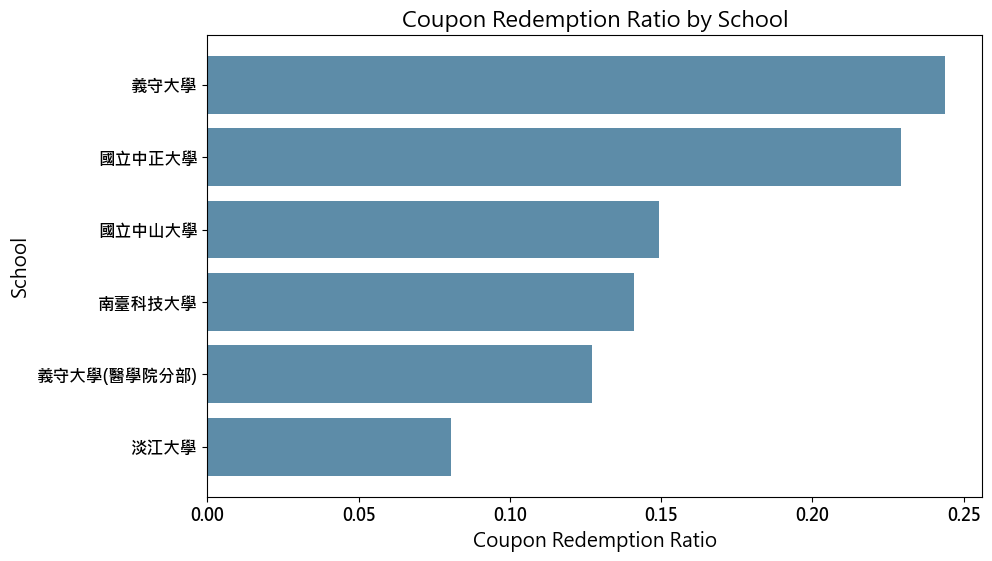

In [420]:
plt.figure(figsize=(10, 6))
plt.barh(member_couponORNOT_ratio['MBR_SCHOOL'], member_couponORNOT_ratio['couponORNOT'], color='#5d8ca8')
plt.xlabel('Coupon Redemption Ratio')
plt.ylabel('School')
plt.title('Coupon Redemption Ratio by School')
plt.gca().invert_yaxis() 
plt.show()

##### 各校兌換券的兌換比例

In [421]:
#各校兌換比例
school_coupon_count=coupon.groupby('MBR_SCHOOL').size().reset_index(name='count')
school_coupon_count

,MBR_SCHOOL,count
0,南臺科技大學,766
1,國立中山大學,564
2,國立中正大學,1843
3,淡江大學,700
4,義守大學,1903
5,義守大學(醫學院分部),198


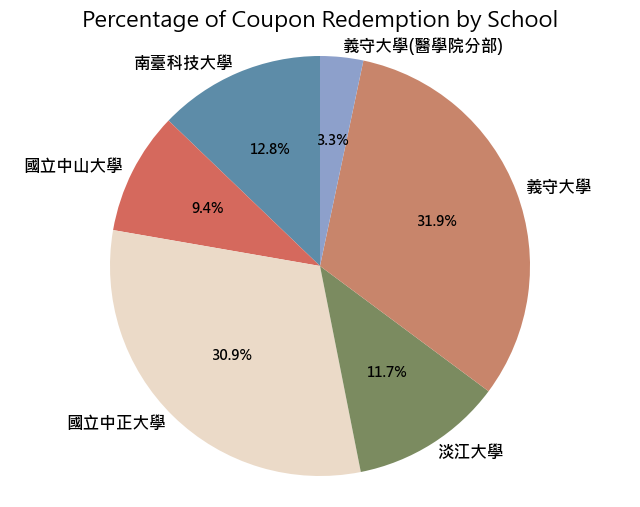

In [422]:
# 整理數據
labels = school_coupon_count['MBR_SCHOOL']
sizes = school_coupon_count['count']
colors = ["#5d8ca8", "#d5695d", "#EBDAC8", "#7b8b60", "#c8856b", "#8da0cb"]

# 繪製圓餅圖
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%.1f%%', startangle=90, colors=colors, labeldistance= 1.05)
plt.title('Percentage of Coupon Redemption by School')
plt.axis('equal')
plt.show()

##### 各校男女兌換兌換券的比例
- 各校兌換比較較多的通常都是女性，除了中山、中正、義大以外

In [423]:
school_sex_coupon_count=member_coupon_count.groupby(['MBR_SCHOOL','UserSex'])['count'].sum().reset_index()
school_sex_coupon_count

,MBR_SCHOOL,UserSex,count
0,南臺科技大學,0,307
1,南臺科技大學,1,459
2,國立中山大學,0,326
3,國立中山大學,1,238
4,國立中正大學,0,937
5,國立中正大學,1,906
6,淡江大學,0,211
7,淡江大學,1,489
8,義守大學,0,972
9,義守大學,1,931


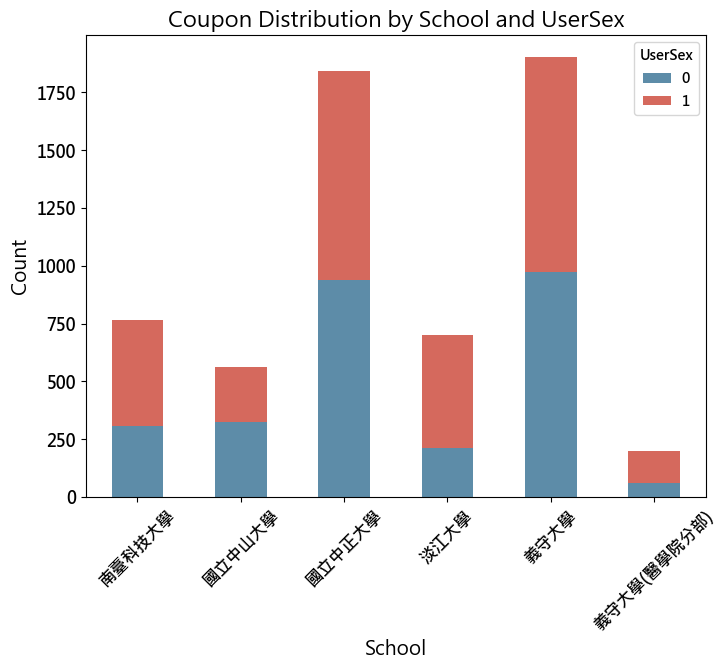

In [424]:
pivot_data = school_sex_coupon_count.pivot(index='MBR_SCHOOL', columns='UserSex', values='count').fillna(0)
pivot_data.plot(kind='bar', stacked=True, figsize=(8, 6), color=colors)
plt.title('Coupon Distribution by School and UserSex')
plt.xlabel('School')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 各校兌換的兌換券比例

In [425]:
# 篩選出前五多的兌換種類
top_8_names = coupon['Name'].value_counts().head(8).index
coupon['Name'] = coupon['Name'].apply(lambda x: x if x in top_8_names else '其他')

# 分組統計每個學校在每類兌換券的數量
school_coupon_counts = coupon.groupby(['MBR_SCHOOL', 'Name']).size().reset_index(name='count')

In [426]:
coupon['Name'].unique()

array(['門市取貨', '門市獨家活動', '其他', '門市專用', '領點專用', '門市限定', '憑券抽', '門市好康',
       '隨換隨領'], dtype=object)

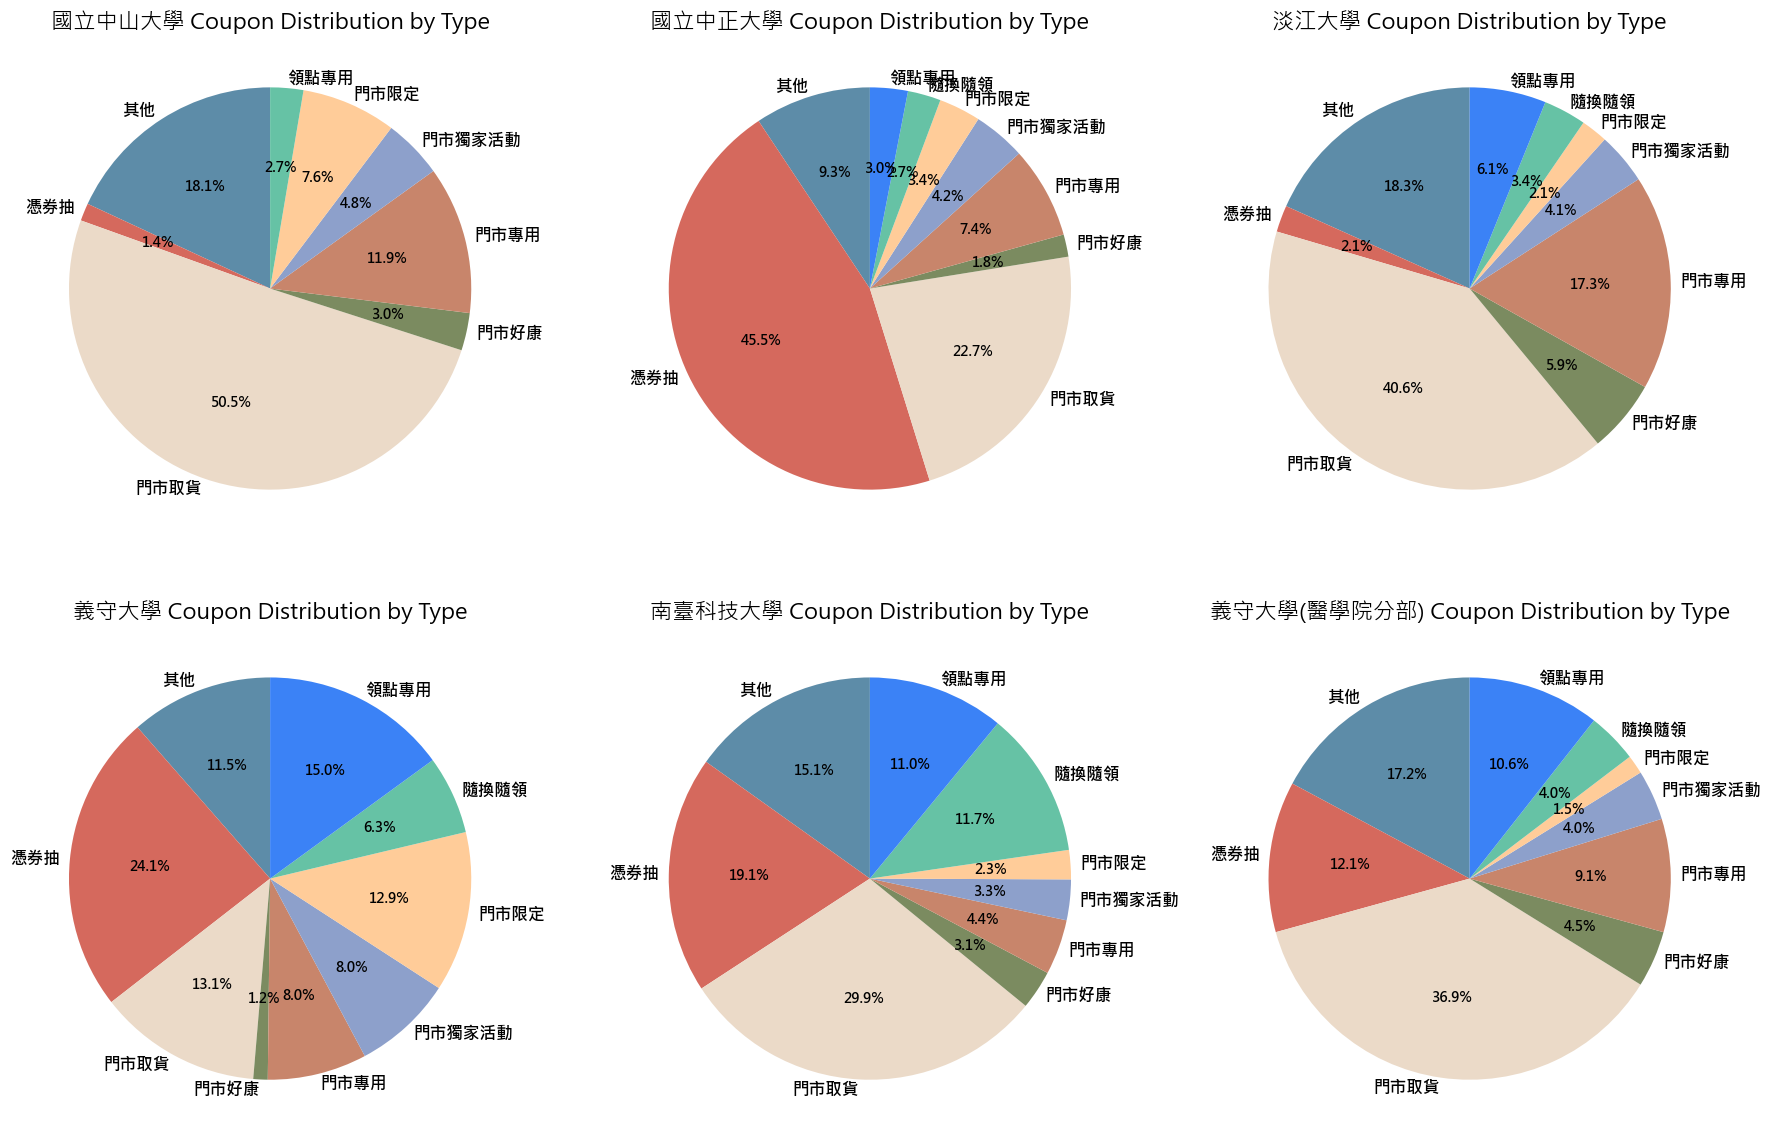

In [566]:
schools = coupon['MBR_SCHOOL'].unique()
colors = [
    "#5d8ca8", "#d5695d", "#EBDAC8", "#7b8b60", "#c8856b", "#8da0cb", "#ffcc99", "#66c2a5","#3B82F6"
]

# 設定子圖排版
num_schools = len(schools)
cols = 3  # 每行顯示3個子圖
rows = (num_schools + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 6))
axes = axes.flatten()

# 繪製每個學校的圓餅圖
for i, school in enumerate(schools):
    school_data = school_coupon_counts[school_coupon_counts['MBR_SCHOOL'] == school]
    ax = axes[i]
    ax.pie(
        school_data['count'], labels=school_data['Name'], autopct='%.1f%%',
        colors=colors, labeldistance=1.05, startangle=90,
    )
    ax.set_title(f'{school} Coupon Distribution by Type')

# 隱藏多餘的子圖軸
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [428]:
coupon

,MBR_SCHOOL,UserID,UserSex,Name,year,month
0,國立中山大學,900761212,1,門市取貨,2022,6
1,國立中山大學,900761212,1,門市取貨,2021,12
2,國立中山大學,902166568,0,門市獨家活動,2022,9
3,國立中山大學,902329869,0,其他,2021,10
4,國立中山大學,903483681,0,門市專用,2022,2
...,...,...,...,...,...,...
6402,義守大學(醫學院分部),988634590,1,門市取貨,2023,9
6403,義守大學(醫學院分部),988763076,1,其他,2023,9
6404,義守大學(醫學院分部),988763076,1,門市取貨,2023,9
6405,義守大學(醫學院分部),988964113,1,門市取貨,2023,9


##### 各校各類別的兌換卷使用比例

In [429]:
coupon_type_school=coupon.groupby(["MBR_SCHOOL",'Name']).size().reset_index(name="count")
coupon_type_school.head(9)

,MBR_SCHOOL,Name,count
0,南臺科技大學,其他,116
1,南臺科技大學,憑券抽,146
2,南臺科技大學,門市取貨,229
3,南臺科技大學,門市好康,24
4,南臺科技大學,門市專用,34
5,南臺科技大學,門市獨家活動,25
6,南臺科技大學,門市限定,18
7,南臺科技大學,隨換隨領,90
8,南臺科技大學,領點專用,84


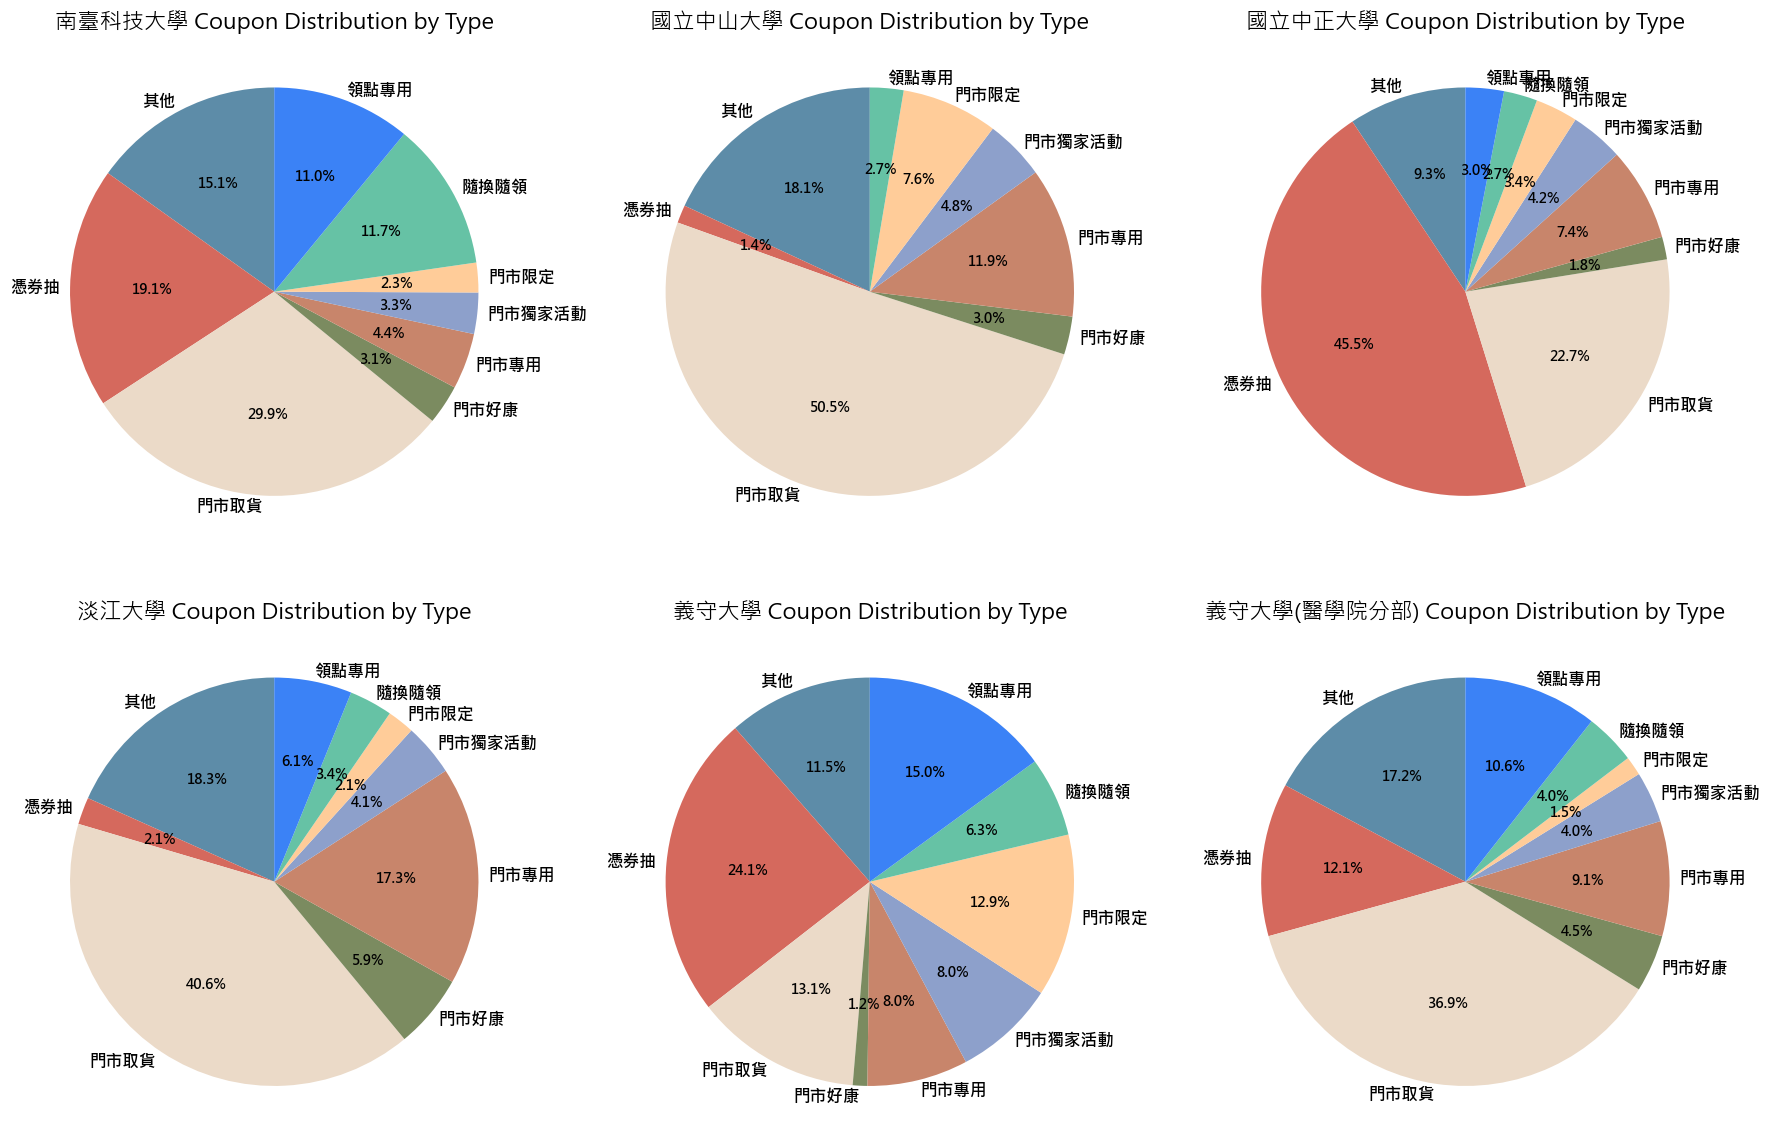

In [567]:
schools = coupon_type_school['MBR_SCHOOL'].unique()
colors = [
    "#5d8ca8", "#d5695d", "#EBDAC8", "#7b8b60", "#c8856b", "#8da0cb", "#ffcc99", "#66c2a5","#3B82F6"
]

# 設定子圖排版
num_schools = len(schools)
cols = 3  # 每行顯示3個子圖
rows = (num_schools + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 6))
axes = axes.flatten()

# 繪製每個學校的圓餅圖
for i, school in enumerate(schools):
    school_data = school_coupon_counts[school_coupon_counts['MBR_SCHOOL'] == school]
    ax = axes[i]
    ax.pie(
        school_data['count'], labels=school_data['Name'], autopct='%.1f%%',
        colors=colors, labeldistance=1.05, startangle=90,
    )
    ax.set_title(f'{school} Coupon Distribution by Type')

# 隱藏多餘的子圖軸
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [431]:
member

,MBR_SCHOOL,UserID,UserSex,Birthday,CreatedDate
0,國立中山大學,919061387,0,1999-01-06,2021-01-19 11:22:21.413
1,國立中山大學,916360484,1,2021-01-27,2021-01-27 17:52:00.263
2,國立中山大學,983835662,1,1987-10-10,2021-02-03 12:44:43.760
3,國立中山大學,979872208,0,2010-09-26,2021-02-20 14:01:19.887
4,國立中山大學,979136556,0,2001-01-07,2021-02-20 15:35:45.860
...,...,...,...,...,...
20409,義守大學(醫學院分部),926796267,1,1995-11-01,2024-04-01 10:26:34.313
20410,義守大學(醫學院分部),903912882,1,2004-04-24,2024-04-01 14:27:24.813
20411,義守大學(醫學院分部),971236397,2,2003-04-16,2023-08-31 22:41:52.693
20412,義守大學(醫學院分部),988471089,1,2005-05-30,2023-09-14 17:00:56.600


##### 兌換卷與年齡的關係

In [432]:
coupon_age = pd.merge(coupon, member[['Birthday','UserID']], on='UserID', how='left')

# 把生日欄位轉成datetime
coupon_age['Birthday'] = pd.to_datetime(coupon_age['Birthday'])

# 計算年齡
coupon_age['age'] = (coupon_age['year'] - coupon_age['Birthday'].dt.year) - ((coupon_age['month'] < coupon_age['Birthday'].dt.month) | ((coupon_age['month'] == coupon_age['Birthday'].dt.month) & (coupon_age['year'] < coupon_age['Birthday'].dt.year)))

# 把年齡的欄位轉成int資料型態再把NA值去掉
coupon_age.dropna(subset=['age'], inplace=True)
coupon_age['age'] = coupon_age['age'].astype(int)
coupon_age

,MBR_SCHOOL,UserID,UserSex,Name,year,month,Birthday,age
0,國立中山大學,900761212,1,門市取貨,2022,6,2003-06-16,19
1,國立中山大學,900761212,1,門市取貨,2021,12,2003-06-16,18
2,國立中山大學,902166568,0,門市獨家活動,2022,9,2003-06-02,19
3,國立中山大學,902329869,0,其他,2021,10,2003-09-01,18
4,國立中山大學,903483681,0,門市專用,2022,2,2003-01-02,19
...,...,...,...,...,...,...,...,...
5967,義守大學(醫學院分部),984220955,1,其他,2023,9,2005-02-27,18
5968,義守大學(醫學院分部),984220955,1,門市取貨,2023,9,2005-02-27,18
5969,義守大學(醫學院分部),988634590,1,門市取貨,2023,9,2004-04-12,19
5972,義守大學(醫學院分部),988964113,1,門市取貨,2023,9,2005-04-29,18


In [433]:
coupon_age_count=coupon_age.groupby(["UserID",'MBR_SCHOOL','UserSex','age']).size().reset_index(name='count')
coupon_age_count

,UserID,MBR_SCHOOL,UserSex,age,count
0,900008283,南臺科技大學,1,18,1
1,900029578,國立中山大學,1,18,1
2,900029961,南臺科技大學,0,18,1
3,900030001,國立中山大學,0,18,1
4,900030222,淡江大學,1,18,1
...,...,...,...,...,...
3377,989971965,義守大學(醫學院分部),1,20,10
3378,989971965,義守大學(醫學院分部),1,21,1
3379,989972056,義守大學(醫學院分部),1,18,1
3380,989981078,國立中正大學,0,19,1


In [434]:
# 依照年齡分組
coupon_age_count=coupon_age_count.groupby("age")['count'].sum().reset_index()
coupon_age_count=coupon_age_count[(coupon_age_count['age']<=30) & (coupon_age_count['age']>=18)]
coupon_age_count

,age,count
9,18,1893
10,19,1839
11,20,910
12,21,217
13,22,126
14,23,104
15,24,108
16,25,45
17,26,35
18,27,41


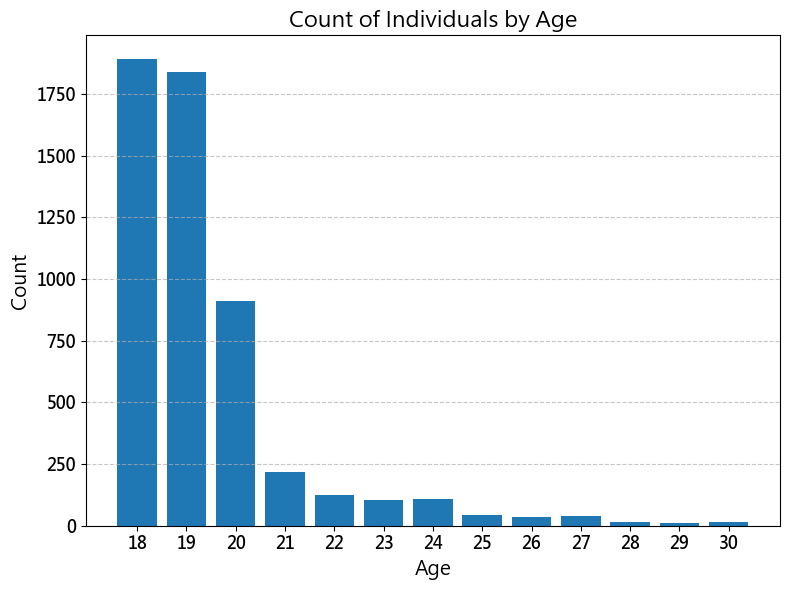

In [435]:
plt.figure(figsize=(8, 6))
plt.bar(coupon_age_count['age'], coupon_age_count['count'])
plt.title('Count of Individuals by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(coupon_age_count['age'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 兌換的年齡 VS 學校

In [436]:
coupon_age_school=coupon_age.groupby(['MBR_SCHOOL','age']).size().reset_index(name='count')
coupon_age_school=coupon_age_school[(coupon_age_school['age']<=30) & (coupon_age_school['age']>=18)] # 將年齡限制於17-26歲
coupon_age_school.head()

,MBR_SCHOOL,age,count
6,南臺科技大學,18,257
7,南臺科技大學,19,228
8,南臺科技大學,20,127
9,南臺科技大學,21,36
10,南臺科技大學,22,5


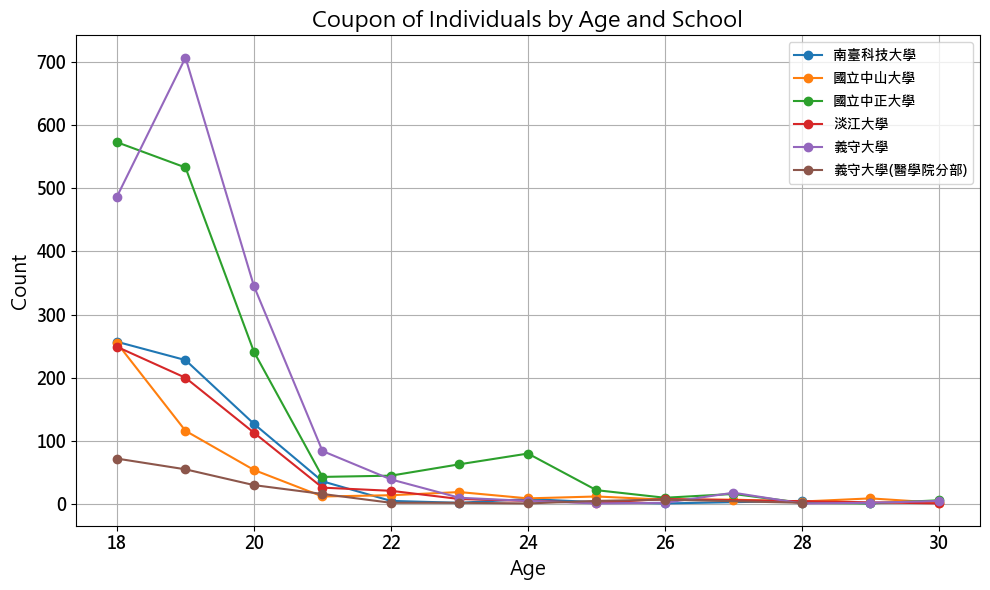

In [437]:
# Get unique schools
schools = coupon_age_school['MBR_SCHOOL'].unique()

# Plot each school
plt.figure(figsize=(10, 6))
for school in schools:
    school_data = coupon_age_school[coupon_age_school['MBR_SCHOOL'] == school]
    plt.plot(school_data['age'], school_data['count'], marker='o', label=school)

# Plot settings
plt.title('Coupon of Individuals by Age and School')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### 兌換券的類型與性別的關係
- 分析性別會傾向兌換哪類型的券

In [438]:
coupon_type_sex=coupon.groupby(['Name','UserSex']).size().reset_index(name="count")
coupon_type_sex

,Name,UserSex,count
0,其他,0,350
1,其他,1,420
2,憑券抽,0,734
3,憑券抽,1,755
4,門市取貨,0,778
5,門市取貨,1,762
6,門市好康,0,60
7,門市好康,1,86
8,門市專用,0,204
9,門市專用,1,324


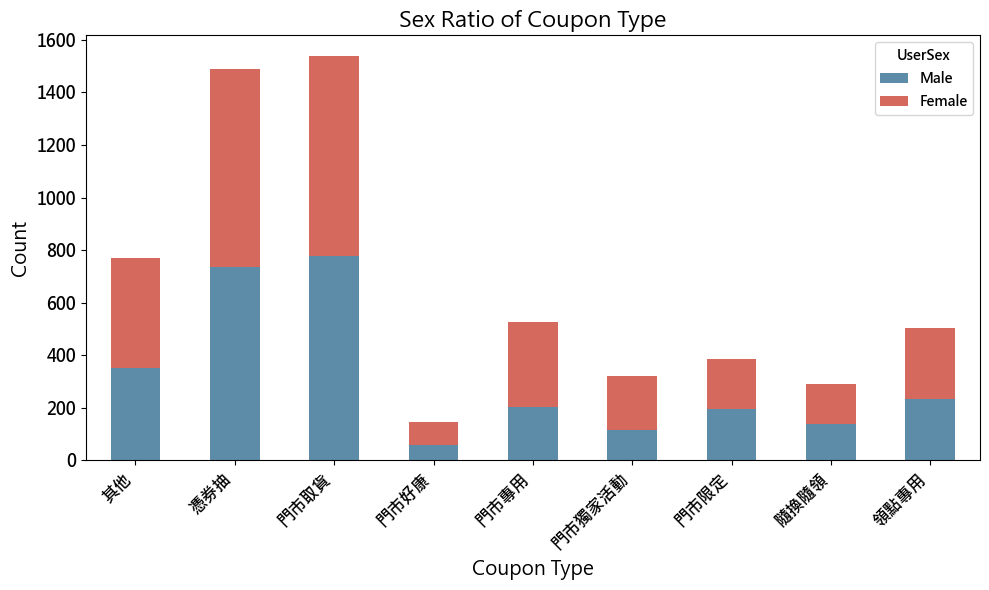

In [439]:
# 依照兌換另行跟性別分組
grouped = coupon_type_sex.groupby(['Name', 'UserSex']).sum().unstack()

#指定顏色
colors = ["#5d8ca8", "#d5695d"]

# 畫堆疊圖
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.title('Sex Ratio of Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(['Male', 'Female'], title='UserSex')
plt.tight_layout()
plt.show()

##### 兌換券類型跟年齡的關係

In [440]:
coupon_type_age=coupon_age.groupby(["Name",'age']).size().reset_index(name="count")
coupon_type_age=coupon_type_age[(coupon_type_age['age']<=30) & (coupon_type_age['age']>=18)]
coupon_type_age

,Name,age,count
5,其他,18,191
6,其他,19,264
7,其他,20,114
8,其他,21,38
9,其他,22,15
...,...,...,...
193,領點專用,25,3
194,領點專用,26,2
195,領點專用,27,3
196,領點專用,28,4


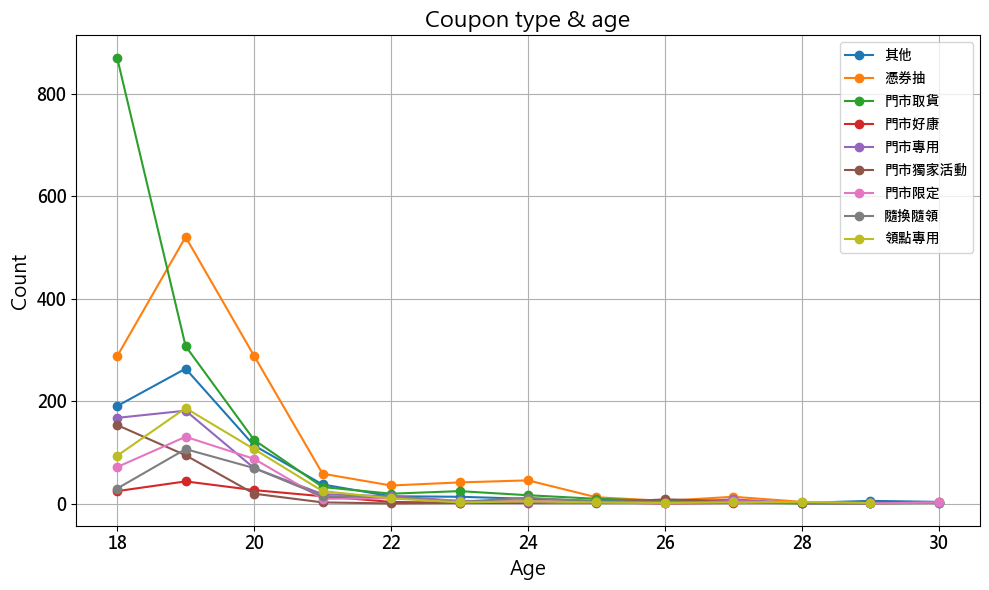

In [441]:
# 兌換卷的類型
coup_type = coupon_type_age['Name'].unique()

plt.figure(figsize=(10, 6))
for ty in coup_type:
    type_data = coupon_type_age[coupon_type_age['Name'] == ty]
    plt.plot(type_data['age'], type_data['count'], marker='o', label=ty)

plt.title('Coupon type & age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 從紅利點數角度

##### 所有會員的紅利點數 領取情況

In [442]:
# 先把紅利點數值為0的資料篩選掉
point = point[(point['Point']>0 ) & (point['UserSex'] != 2)]
point

,MBR_SCHOOL,UserID,UserSex,Point,Remark,CreatedDate,Year,Month,Day
0,國立中山大學,900022037,0,3.0,天天上APP，天天簽到送點數，恭喜獲得,2022-03-08 12:58:36.970,2022,3,2022-03-08
1,國立中山大學,900022037,0,3.0,天天上APP，天天簽到送點數，恭喜獲得,2022-03-09 17:13:00.143,2022,3,2022-03-09
2,國立中山大學,900022037,0,3.0,天天上APP，天天簽到送點數，恭喜獲得,2022-03-10 12:36:15.573,2022,3,2022-03-10
3,國立中山大學,900022037,0,3.0,天天上APP，天天簽到送點數，恭喜獲得,2022-03-11 13:31:43.613,2022,3,2022-03-11
4,國立中山大學,900022037,0,15.0,天天上APP，週末簽到送點數，恭喜獲得,2022-03-12 13:09:25.557,2022,3,2022-03-12
...,...,...,...,...,...,...,...,...,...
355939,義守大學(醫學院分部),989959970,1,15.0,一見你就有好心情，恭喜獲得,2024-03-09 13:34:44.717,2024,3,2024-03-09
355940,義守大學(醫學院分部),989959970,1,10.0,到麗文校園門市使用文化幣，恭喜獲得,2024-03-12 10:07:30.730,2024,3,2024-03-12
355941,義守大學(醫學院分部),989959970,1,10.0,抬頭看天空，恭喜獲得,2024-03-14 08:31:32.087,2024,3,2024-03-14
355942,義守大學(醫學院分部),989972056,1,30.0,天天上APP，週末簽到送點數，恭喜獲得,2023-09-21 17:29:12.207,2023,9,2023-09-21


In [443]:
# 紅利領取次數計算
member_point_count = point.groupby(['UserID','UserSex','MBR_SCHOOL']).size().reset_index(name='count')
member_point_count

,UserID,UserSex,MBR_SCHOOL,count
0,900001023,0,南臺科技大學,2
1,900002271,0,淡江大學,2
2,900008283,1,南臺科技大學,13
3,900009691,0,義守大學,11
4,900011046,1,義守大學,11
...,...,...,...,...
18671,989985917,1,國立中正大學,32
18672,989986908,1,義守大學,4
18673,989991647,0,南臺科技大學,9
18674,989993202,0,淡江大學,1


- 跟member資料表合併，因為某些會員可能沒有領過紅利點數

In [444]:
member_point = pd.merge(member, member_point_count[['UserID', 'count']], on='UserID', how='left')
member_point = member_point[member_point['UserSex']!=2]
member_point

,MBR_SCHOOL,UserID,UserSex,Birthday,CreatedDate,count
0,國立中山大學,919061387,0,1999-01-06,2021-01-19 11:22:21.413,14.0
1,國立中山大學,916360484,1,2021-01-27,2021-01-27 17:52:00.263,7.0
2,國立中山大學,983835662,1,1987-10-10,2021-02-03 12:44:43.760,6.0
3,國立中山大學,979872208,0,2010-09-26,2021-02-20 14:01:19.887,18.0
4,國立中山大學,979136556,0,2001-01-07,2021-02-20 15:35:45.860,1.0
...,...,...,...,...,...,...
20407,義守大學(醫學院分部),909612719,1,2004-11-29,2024-02-29 09:20:16.467,NaN
20408,義守大學(醫學院分部),972175870,1,2004-11-05,2024-03-07 14:13:36.650,NaN
20409,義守大學(醫學院分部),926796267,1,1995-11-01,2024-04-01 10:26:34.313,NaN
20410,義守大學(醫學院分部),903912882,1,2004-04-24,2024-04-01 14:27:24.813,NaN


- 根據前面計算的領點次數，增加一欄位pointORNOT標記判斷是否領過紅利點數

In [445]:
member_point['pointORNOT'] = member_point['count'].notna().astype(int)
member_point['count'] = member_point['count'].fillna(0)
member_point

,MBR_SCHOOL,UserID,UserSex,Birthday,CreatedDate,count,pointORNOT
0,國立中山大學,919061387,0,1999-01-06,2021-01-19 11:22:21.413,14.0,1
1,國立中山大學,916360484,1,2021-01-27,2021-01-27 17:52:00.263,7.0,1
2,國立中山大學,983835662,1,1987-10-10,2021-02-03 12:44:43.760,6.0,1
3,國立中山大學,979872208,0,2010-09-26,2021-02-20 14:01:19.887,18.0,1
4,國立中山大學,979136556,0,2001-01-07,2021-02-20 15:35:45.860,1.0,1
...,...,...,...,...,...,...,...
20407,義守大學(醫學院分部),909612719,1,2004-11-29,2024-02-29 09:20:16.467,0.0,0
20408,義守大學(醫學院分部),972175870,1,2004-11-05,2024-03-07 14:13:36.650,0.0,0
20409,義守大學(醫學院分部),926796267,1,1995-11-01,2024-04-01 10:26:34.313,0.0,0
20410,義守大學(醫學院分部),903912882,1,2004-04-24,2024-04-01 14:27:24.813,0.0,0


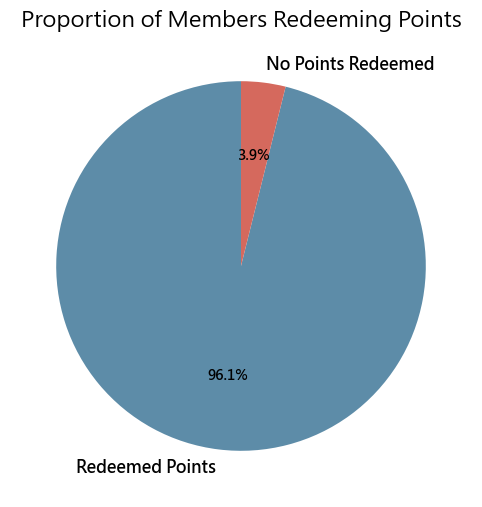

In [446]:
# 計算是否領過紅利點數的次數，並轉成比例
value_counts = member_point['pointORNOT'].value_counts(normalize=True)

# 設定標籤，包含名稱與 count 值
labels_with_count = [f'{label}: {int(value_counts[label])}' for label in value_counts.index]

# 繪製圓餅圖
plt.figure(figsize=(8, 6))
value_counts.plot.pie(
    autopct='%.1f%%', 
    startangle=90, 
    colors=['#5d8ca8', '#d5695d'],  
    labels=['Redeemed Points', 'No Points Redeemed']
)
plt.title('Proportion of Members Redeeming Points')
plt.ylabel('')  # 移除預設的 y 軸標籤
plt.show()

##### 各校每年各月紅利點數領取次數總計

In [447]:
#各會員紅利點數兌換次數總計
point_time_count = point.groupby(['MBR_SCHOOL','Year','Month']).size().reset_index(name='count')
point_time_count['Year']=point_time_count['Year'].astype(int)
point_time_count['Month']=point_time_count['Month'].astype(int)
point_time_count

,MBR_SCHOOL,Year,Month,count
0,南臺科技大學,2020,9,1
1,南臺科技大學,2020,11,1
2,南臺科技大學,2021,1,1
3,南臺科技大學,2021,2,3
4,南臺科技大學,2021,3,4
...,...,...,...,...
237,義守大學(醫學院分部),2023,11,642
238,義守大學(醫學院分部),2023,12,431
239,義守大學(醫學院分部),2024,1,335
240,義守大學(醫學院分部),2024,2,462


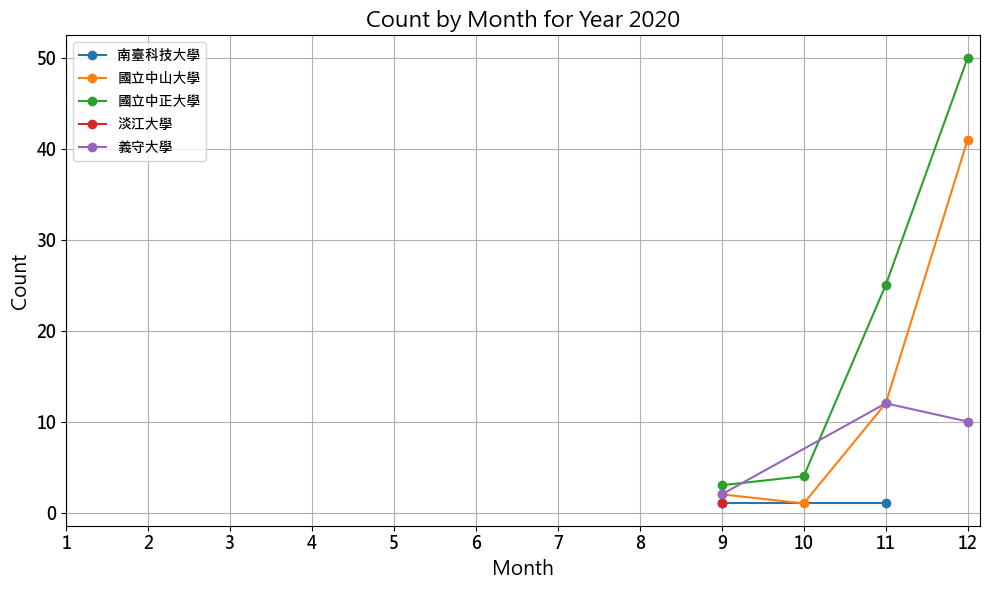

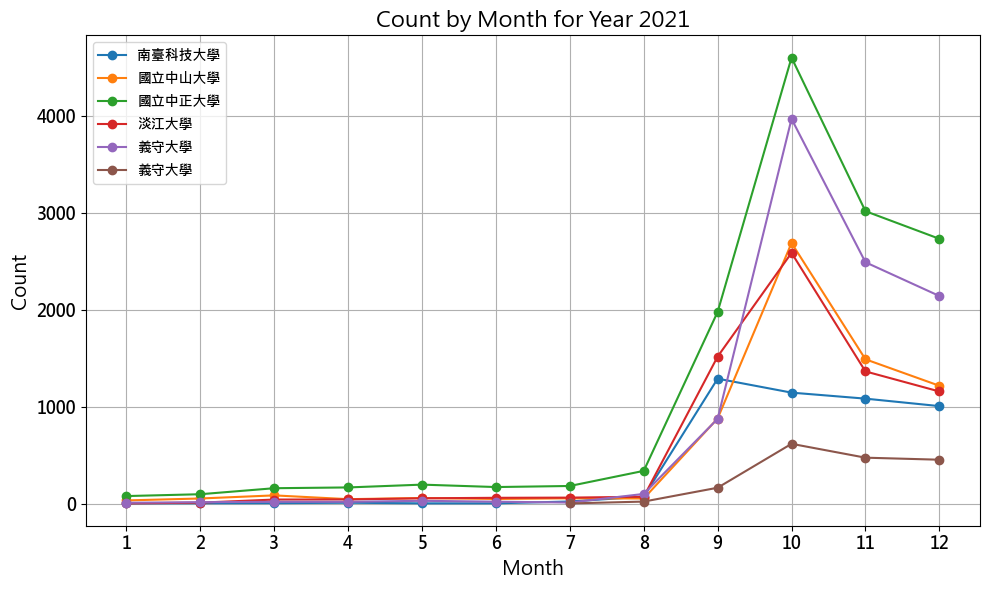

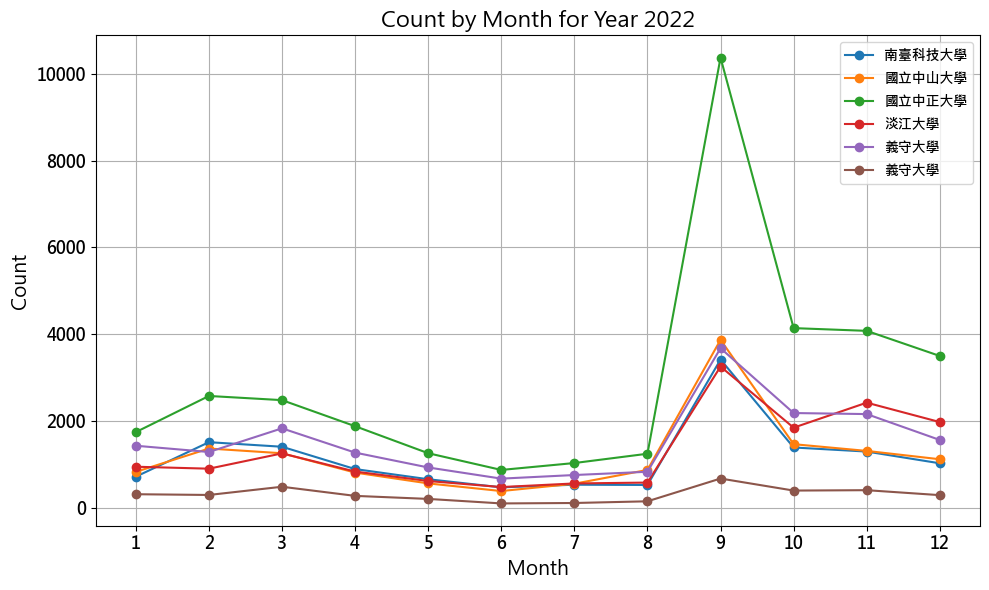

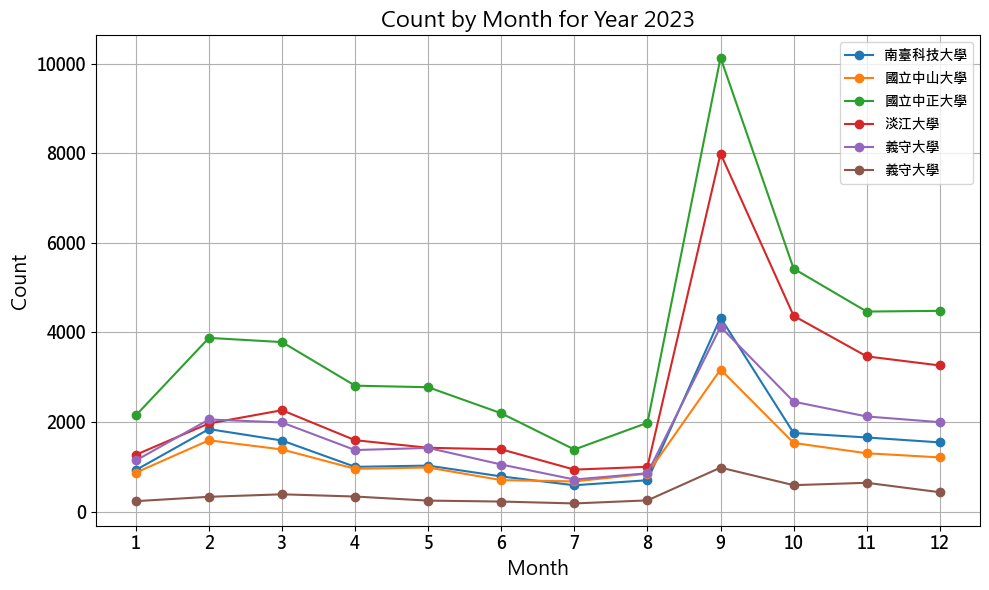

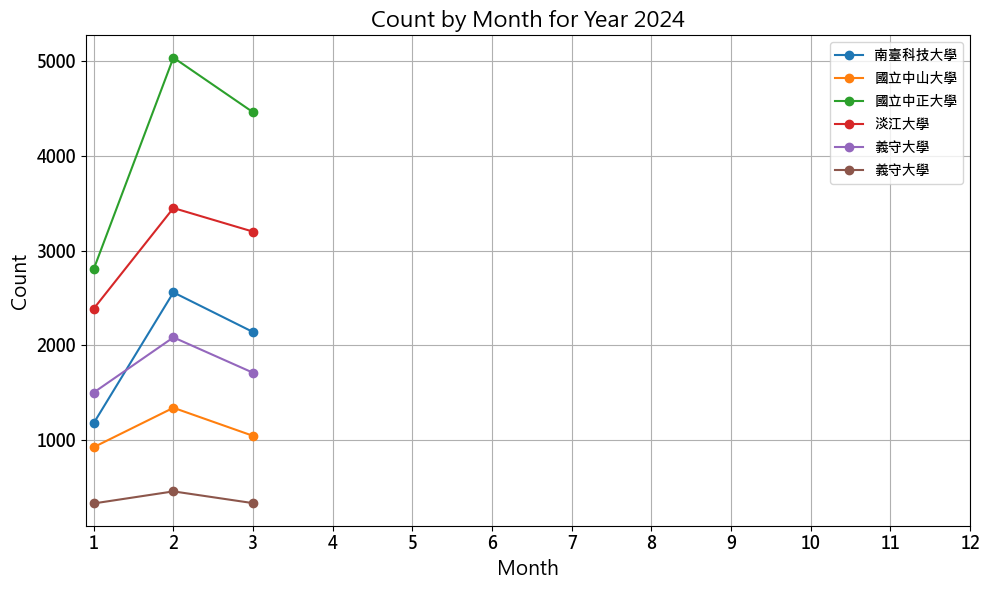

In [448]:
# 根據時間與學校資料分組
grouped = point_time_count.groupby(['Year', 'MBR_SCHOOL'])

years = point_time_count['Year'].unique()
for year in years:
    plt.figure(figsize=(10, 6))
    for school, group in grouped:
        if year in group['Year'].values:
            school_data = group[group['Year'] == year]
            # 抓取學校的名字
            school_name = school_data['MBR_SCHOOL'].iloc[0].split('(')[0]
            plt.plot(school_data['Month'], school_data['count'], marker='o', label=school_name)
    plt.title(f'Count by Month for Year {year}')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.xticks(range(1, 13))  # 設置月份
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

##### 各校會員平均領取紅利點數頻率

In [449]:
# 各校會員兌換紅利點數頻率(每年)
school_point_freq = point.groupby(['MBR_SCHOOL','UserID','Year']).size().reset_index(name='count')
school_point_freq = school_point_freq.groupby(['MBR_SCHOOL','UserID'])['count'].mean().reset_index(name='freq')
school_point_freq = school_point_freq.groupby('MBR_SCHOOL')['freq'].mean().reset_index(name='freq')
school_point_freq = school_point_freq.sort_values(by='freq', ascending=False)
school_point_freq

,MBR_SCHOOL,freq
2,國立中正大學,8.377198
4,義守大學,7.934717
1,國立中山大學,6.880273
5,義守大學(醫學院分部),6.786716
0,南臺科技大學,6.247869
3,淡江大學,5.737957


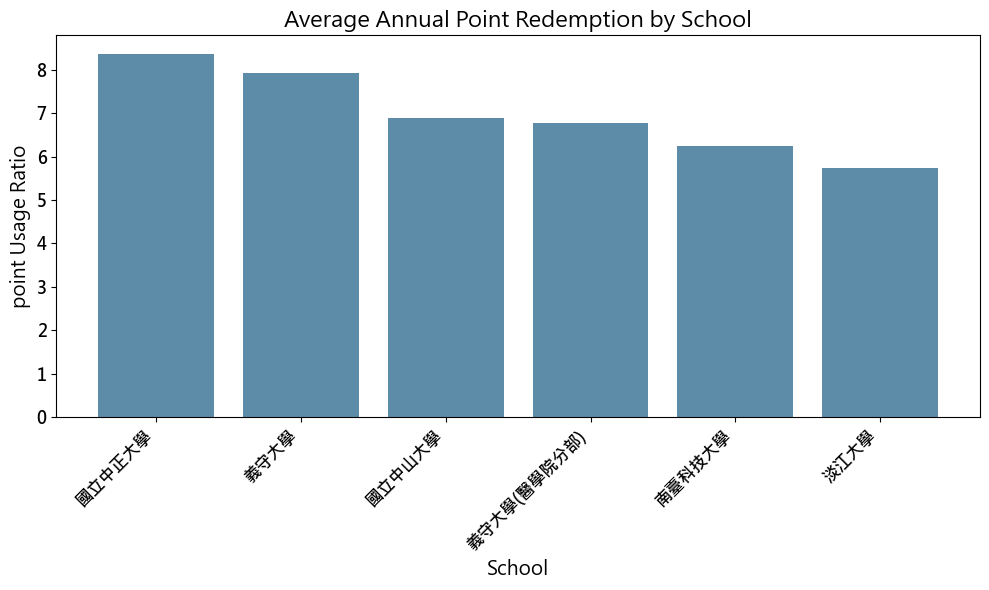

In [450]:
plt.figure(figsize=(10, 6))
plt.bar(school_point_freq['MBR_SCHOOL'], school_point_freq['freq'], color='#5d8ca8')
plt.title('Average Annual Point Redemption by School')
plt.xlabel('School')
plt.ylabel('point Usage Ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 紅利點數與年齡的關係
- 看哪個年齡比較傾向領取紅利點數

In [451]:
point_age = pd.merge(point, member[['Birthday','UserID']], on='UserID', how='left')

# 把生日欄位轉成datetime
point_age['Birthday'] = pd.to_datetime(point_age['Birthday'])

# 計算年齡
point_age['age'] = (point_age['Year'] - point_age['Birthday'].dt.year) - ((point_age['Month'] < point_age['Birthday'].dt.month) | ((point_age['Month'] == point_age['Birthday'].dt.month) & (point_age['Year'] < point_age['Birthday'].dt.year)))

# 年齡轉int型態，並把NA值去除
point_age.dropna(subset=['age'], inplace=True)
point_age['age'] = point_age['age'].astype(int)
point_age

,MBR_SCHOOL,UserID,UserSex,Point,Remark,CreatedDate,Year,Month,Day,Birthday,age
0,國立中山大學,900022037,0,3.0,天天上APP，天天簽到送點數，恭喜獲得,2022-03-08 12:58:36.970,2022,3,2022-03-08,2002-06-23,19
1,國立中山大學,900022037,0,3.0,天天上APP，天天簽到送點數，恭喜獲得,2022-03-09 17:13:00.143,2022,3,2022-03-09,2002-06-23,19
2,國立中山大學,900022037,0,3.0,天天上APP，天天簽到送點數，恭喜獲得,2022-03-10 12:36:15.573,2022,3,2022-03-10,2002-06-23,19
3,國立中山大學,900022037,0,3.0,天天上APP，天天簽到送點數，恭喜獲得,2022-03-11 13:31:43.613,2022,3,2022-03-11,2002-06-23,19
4,國立中山大學,900022037,0,15.0,天天上APP，週末簽到送點數，恭喜獲得,2022-03-12 13:09:25.557,2022,3,2022-03-12,2002-06-23,19
...,...,...,...,...,...,...,...,...,...,...,...
317673,義守大學(醫學院分部),989959970,1,15.0,一見你就有好心情，恭喜獲得,2024-03-09 13:34:44.717,2024,3,2024-03-09,2004-09-27,19
317674,義守大學(醫學院分部),989959970,1,10.0,到麗文校園門市使用文化幣，恭喜獲得,2024-03-12 10:07:30.730,2024,3,2024-03-12,2004-09-27,19
317675,義守大學(醫學院分部),989959970,1,10.0,抬頭看天空，恭喜獲得,2024-03-14 08:31:32.087,2024,3,2024-03-14,2004-09-27,19
317676,義守大學(醫學院分部),989972056,1,30.0,天天上APP，週末簽到送點數，恭喜獲得,2023-09-21 17:29:12.207,2023,9,2023-09-21,2005-05-21,18


In [452]:
# 將年齡限制於18-30之間，並計算每個年齡的人數
point_age_count=point_age.groupby(["UserID",'MBR_SCHOOL','UserSex','age']).size().reset_index(name='count')
point_age_count=point_age_count.groupby("age")['count'].sum().reset_index()
point_age_count=point_age_count[(point_age_count['age']<=30) & (point_age_count['age']>=18)]
point_age_count

,age,count
22,18,81132
23,19,95064
24,20,51364
25,21,16542
26,22,7511
27,23,7801
28,24,5184
29,25,2564
30,26,1728
31,27,1690


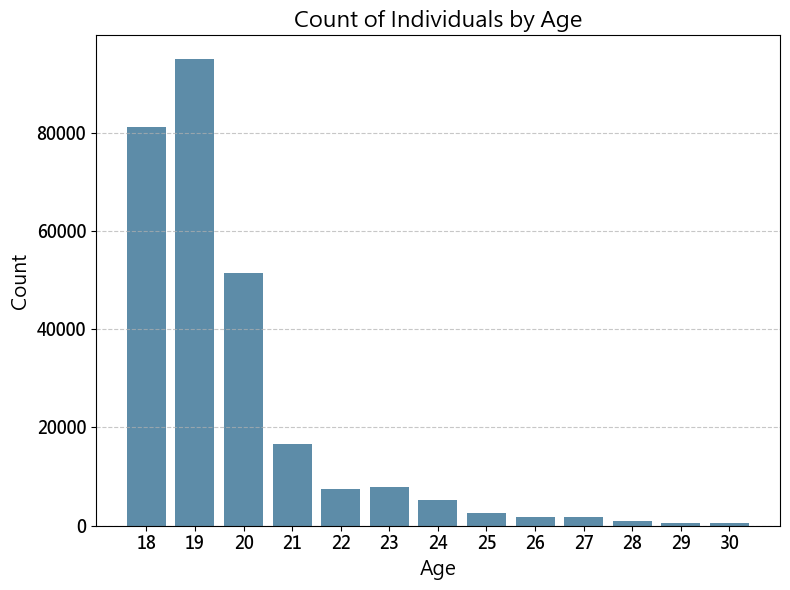

In [453]:
# 繪製長條圖
plt.figure(figsize=(8, 6))
plt.bar(point_age_count['age'], point_age_count['count'], color='#5d8ca8')
plt.title('Count of Individuals by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(point_age_count['age'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 年齡與學校的關係
- 更細看哪個學校的年齡較傾向領取紅利點數

In [454]:
point_age_school=point_age.groupby(['MBR_SCHOOL','age']).size().reset_index(name='count')
point_age_school=point_age_school[(point_age_school['age']<=30) & (point_age_school['age']>=18)]
point_age_school

,MBR_SCHOOL,age,count
15,南臺科技大學,18,10151
16,南臺科技大學,19,13504
17,南臺科技大學,20,8324
18,南臺科技大學,21,3152
19,南臺科技大學,22,694
...,...,...,...
268,義守大學(醫學院分部),26,84
269,義守大學(醫學院分部),27,97
270,義守大學(醫學院分部),28,112
271,義守大學(醫學院分部),29,38


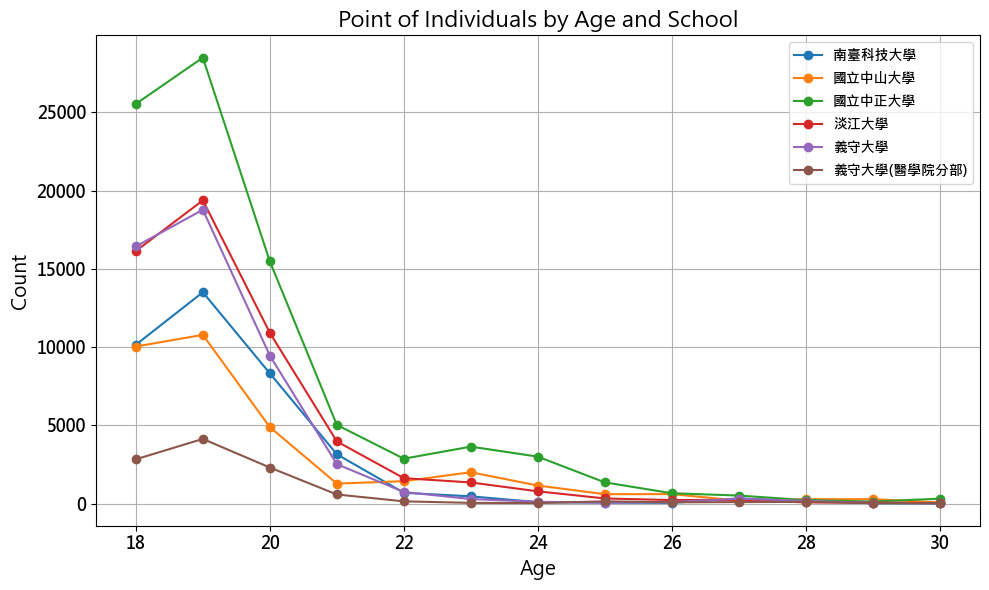

In [455]:
# 抓取學校學校
schools = point_age_school['MBR_SCHOOL'].unique()

plt.figure(figsize=(10, 6))
for school in schools:
    school_data = point_age_school[point_age_school['MBR_SCHOOL'] == school]
    plt.plot(school_data['age'], school_data['count'], marker='o', label=school)


plt.title('Point of Individuals by Age and School')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 從POS角度

##### 支付使用紅利點數折抵比例(yes/no)

In [473]:
pos['use_point'] = pos.groupby(['客戶代號', '單號'])['紅利取用'].transform(lambda x: 1 if (x > 0).any() else 0)
pos

C:\Users\Shelly\AppData\Local\Temp\ipykernel_28208\3432757937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['use_point'] = pos.groupby(['客戶代號', '單號'])['紅利取用'].transform(lambda x: 1 if (x > 0).any() else 0)


,倉別名稱,客戶代號,單號,結帳日期,產品名稱,基本數量,類別名稱,實際銷貨價,實際銷售小計,已收現金,...,刷卡金額,一卡通實付金額,LinePay實付金額,獲得紅利,退回紅利,紅利取用,紅利取用退回,抵用金額,促銷組合獲得紅利點數,use_point
18,中山,D961360266,11001040090,110.01.04,Pentel 易拭型塑膠擦-小 #ZEL-05,2,設計、文具,10.0,20,84,...,0,0,0,84,0,0,0,0,0,0
19,中山,D961360266,11001040090,110.01.04,單面七彩索引片 17*26mm #WL-3066 華麗牌,1,設計、文具,12.0,12,84,...,0,0,0,84,0,0,0,0,0,0
20,中山,D961360266,11001040090,110.01.04,單面七彩索引片 17*42mm #WL-3065 華麗牌,1,設計、文具,12.0,12,84,...,0,0,0,84,0,0,0,0,0,0
21,中山,D961360266,11001040090,110.01.04,18K環保計算紙,2,設計、文具,20.0,40,84,...,0,0,0,84,0,0,0,0,0,0
22,中山,D963619834,11001040091,110.01.04,利百代LB5008CA工程計算機,1,設計、文具,199.0,199,199,...,0,0,0,199,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078898,義大,C905813630,11303201271,113.03.20,黃阿瑪的後宮生活 貓咪超有事3-貓貓美食救援計畫,1,社會書,264.0,264,0,...,264,0,0,264,0,0,0,0,0,0
1078903,義大,B958830134,11303201290,113.03.20,細版DIY26孔夾#JNC-05,1,設計、文具,36.0,36,58,...,0,0,0,58,0,0,0,0,0,0
1078904,義大,B958830134,11303201290,113.03.20,好好用26孔DIY/PP板,1,設計、文具,22.0,22,58,...,0,0,0,58,0,0,0,0,0,0
1078905,義大,B908879198,11303201296,113.03.20,Power BI 快速入門,1,教科書,441.0,441,441,...,0,0,0,441,0,0,0,0,0,0


In [474]:
pay_with_point = pos.groupby(['客戶代號', '單號'])['use_point'].max().reset_index()
pay_with_point

,客戶代號,單號,use_point
0,0966096519,11106010079,0
1,0966096519,11106020074,0
2,0966096519,11106020086,0
3,0966096519,11107060007,0
4,0966096519,11107060009,0
...,...,...,...
184199,重覆b961527107,11204111389,0
184200,重覆b961527107,11204111392,0
184201,重覆b961527107,11204140828,0
184202,重覆b961527107,11205120810,0


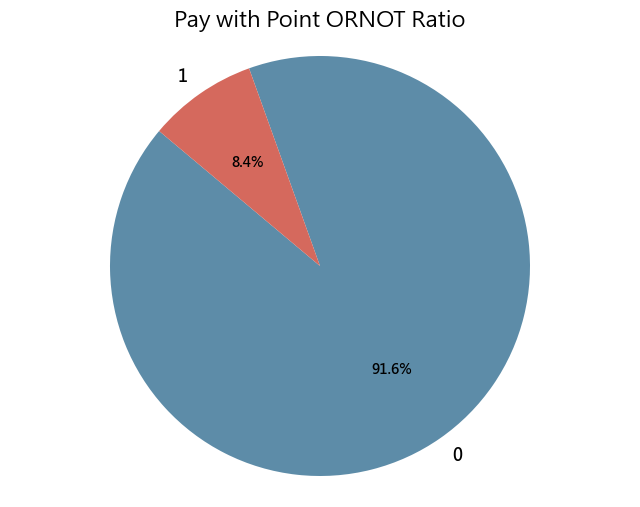

In [475]:
# 根據use_point分組
point_counts = pay_with_point['use_point'].value_counts()


plt.figure(figsize=(8, 6))
plt.pie(point_counts, labels=point_counts.index, autopct='%1.1f%%', startangle=140, colors=["#5d8ca8", "#d5695d"])
plt.title('Pay with Point ORNOT Ratio')
plt.axis('equal')  
plt.show()

##### 支付時使用禮卷折抵比例(yes/no)

In [476]:
pos['use_giftcerti'] = pos.groupby(['客戶代號', '單號'])['禮券金額'].transform(lambda x: 1 if (x > 0).any() else 0)

pay_with_certi=pos.groupby(['客戶代號', '單號'])['use_giftcerti'].max().reset_index()
pay_with_certi

C:\Users\Shelly\AppData\Local\Temp\ipykernel_28208\1756445323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['use_giftcerti'] = pos.groupby(['客戶代號', '單號'])['禮券金額'].transform(lambda x: 1 if (x > 0).any() else 0)


,客戶代號,單號,use_giftcerti
0,0966096519,11106010079,0
1,0966096519,11106020074,0
2,0966096519,11106020086,0
3,0966096519,11107060007,0
4,0966096519,11107060009,0
...,...,...,...
184199,重覆b961527107,11204111389,0
184200,重覆b961527107,11204111392,0
184201,重覆b961527107,11204140828,0
184202,重覆b961527107,11205120810,0


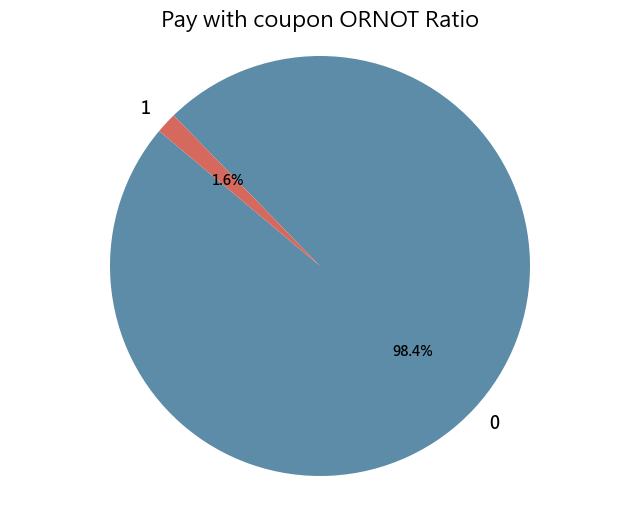

In [477]:
# 根據'use_giftcerti'分組並計算出現次數
giftcerti_counts = pay_with_certi['use_giftcerti'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(giftcerti_counts, labels=giftcerti_counts.index, autopct='%1.1f%%', startangle=140, colors=["#5d8ca8", "#d5695d"])
plt.title('Pay with coupon ORNOT Ratio')
plt.axis('equal') 
plt.show()

##### 各支付方式的比例(現金、刷卡、行動支付)

In [478]:
pos['payBy_money'] = pos.groupby(['客戶代號', '單號'])['已收現金'].transform(lambda x: 1 if (x > 0).any() else 0)
pos['payBy_creditcard'] = pos.groupby(['客戶代號', '單號'])['刷卡金額'].transform(lambda x: 1 if (x > 0).any() else 0)
pos['payBy_line'] = pos.groupby(['客戶代號', '單號'])['LinePay實付金額'].transform(lambda x: 1 if (x > 0).any() else 0)
pos.head()

C:\Users\Shelly\AppData\Local\Temp\ipykernel_28208\1080973342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['payBy_money'] = pos.groupby(['客戶代號', '單號'])['已收現金'].transform(lambda x: 1 if (x > 0).any() else 0)
C:\Users\Shelly\AppData\Local\Temp\ipykernel_28208\1080973342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['payBy_creditcard'] = pos.groupby(['客戶代號', '單號'])['刷卡金額'].transform(lambda x: 1 if (x > 0).any() else 0)
C:\Users\Shelly\AppData\Local\Temp\ipykernel_28208\1080973342.py:3: Set

,倉別名稱,客戶代號,單號,結帳日期,產品名稱,基本數量,類別名稱,實際銷貨價,實際銷售小計,已收現金,...,退回紅利,紅利取用,紅利取用退回,抵用金額,促銷組合獲得紅利點數,use_point,use_giftcerti,payBy_money,payBy_creditcard,payBy_line
18,中山,D961360266,11001040090,110.01.04,Pentel 易拭型塑膠擦-小 #ZEL-05,2,設計、文具,10.0,20,84,...,0,0,0,0,0,0,0,1,0,0
19,中山,D961360266,11001040090,110.01.04,單面七彩索引片 17*26mm #WL-3066 華麗牌,1,設計、文具,12.0,12,84,...,0,0,0,0,0,0,0,1,0,0
20,中山,D961360266,11001040090,110.01.04,單面七彩索引片 17*42mm #WL-3065 華麗牌,1,設計、文具,12.0,12,84,...,0,0,0,0,0,0,0,1,0,0
21,中山,D961360266,11001040090,110.01.04,18K環保計算紙,2,設計、文具,20.0,40,84,...,0,0,0,0,0,0,0,1,0,0
22,中山,D963619834,11001040091,110.01.04,利百代LB5008CA工程計算機,1,設計、文具,199.0,199,199,...,0,0,0,0,0,0,0,1,0,0


In [479]:
pay_type=pos.groupby(['客戶代號', '單號'])[["payBy_money",'payBy_line','payBy_creditcard']].max().reset_index()
pay_type

,客戶代號,單號,payBy_money,payBy_line,payBy_creditcard
0,0966096519,11106010079,0,1,0
1,0966096519,11106020074,0,1,0
2,0966096519,11106020086,0,1,0
3,0966096519,11107060007,0,1,0
4,0966096519,11107060009,0,1,0
...,...,...,...,...,...
184199,重覆b961527107,11204111389,1,0,0
184200,重覆b961527107,11204111392,0,0,0
184201,重覆b961527107,11204140828,1,0,0
184202,重覆b961527107,11205120810,1,0,0


In [480]:
pay_type_count=pay_type[["payBy_money",'payBy_line','payBy_creditcard']].value_counts().reset_index()
pay_type_count

,payBy_money,payBy_line,payBy_creditcard,count
0,1,0,0,148471
1,0,1,0,15885
2,0,0,0,10822
3,0,0,1,8845
4,1,0,1,145
5,1,1,0,35
6,0,1,1,1


In [481]:
pay_type_count = pay_type_count[(pay_type_count['payBy_money'] + pay_type_count['payBy_line'] + pay_type_count['payBy_creditcard']) == 1]

# 計算交易數量
total_count = pay_type_count['count'].sum()

# 每個支付方式的比例
pay_type_count['ratio'] = pay_type_count['count'] / total_count
pay_type_count

C:\Users\Shelly\AppData\Local\Temp\ipykernel_28208\3653754950.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pay_type_count['ratio'] = pay_type_count['count'] / total_count


,payBy_money,payBy_line,payBy_creditcard,count,ratio
0,1,0,0,148471,0.857218
1,0,1,0,15885,0.091714
3,0,0,1,8845,0.051068


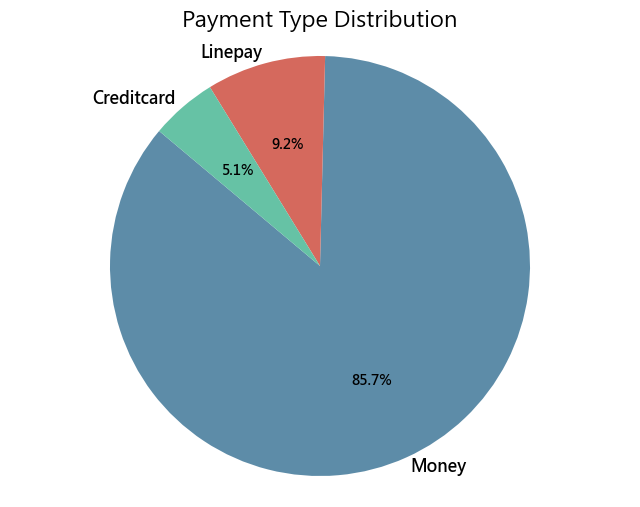

In [482]:
# Create a dictionary to store the labels and ratios for each payment type
payment_types = {
    'Money': pay_type_count.loc[pay_type_count['payBy_money'] == 1, 'ratio'].values[0],
    'Linepay': pay_type_count.loc[pay_type_count['payBy_line'] == 1, 'ratio'].values[0],
    'Creditcard': pay_type_count.loc[pay_type_count['payBy_creditcard'] == 1, 'ratio'].values[0]
}

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(payment_types.values(), labels=payment_types.keys(), autopct='%1.1f%%', startangle=140, labeldistance=1.05, colors=["#5d8ca8", "#d5695d","#66c2a5"])
plt.title('Payment Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

##### 有多少消費屬於會員
- 會員的定義為擁有app帳戶的人，所以有可能擁有app但沒有實體消費過

In [494]:
# 按指定的欄位進行分組並聚合「實際銷售小計」的總和
grouped = pos.groupby(['倉別名稱','單號','客戶代號','結帳日期','use_point','use_giftcerti','payBy_money','payBy_creditcard','payBy_line'])

# 定義 Lambda 函數以串接唯一字串
concat_unique = lambda x: ','.join(set(x))

# 總合「實際銷售小計」，並合併「類別名稱」的字串
pos_clean = grouped.agg({'實際銷售小計': 'sum', '類別名稱': concat_unique})

# 重設index
pos_clean = pos_clean.reset_index()

pos_clean

,倉別名稱,單號,客戶代號,結帳日期,use_point,use_giftcerti,payBy_money,payBy_creditcard,payBy_line,實際銷售小計,類別名稱
0,中山,11001040090,D961360266,110.01.04,0,0,1,0,0,84,設計、文具
1,中山,11001040091,D963619834,110.01.04,0,0,1,0,0,199,設計、文具
2,中山,11001040097,D965743935,110.01.04,0,0,1,0,0,50,設計、文具
3,中山,11001040127,D966445942,110.01.04,1,0,1,0,0,204,"促銷代碼,設計、文具"
4,中山,11001040144,D911695857,110.01.04,0,0,1,0,0,44,設計、文具
...,...,...,...,...,...,...,...,...,...,...,...
184199,義大,11303201261,B965704422,113.03.20,0,0,1,0,0,458,"生活百貨,3C"
184200,義大,11303201271,C905813630,113.03.20,0,0,0,1,0,264,社會書
184201,義大,11303201290,B958830134,113.03.20,0,0,1,0,0,58,設計、文具
184202,義大,11303201296,B908879198,113.03.20,0,0,1,0,0,441,教科書


- 篩選出非數字的資料並移除

In [496]:
# 使用正規表示式只保留數字
pos_clean['客戶代號'] = pos_clean['客戶代號'].str.replace(r'[^0-9]', '', regex=True)

# 重新命名欄位
pos_clean.rename(columns={'客戶代號': 'UserID'}, inplace=True)

# 將 UserID 轉換為數值型別
pos_clean['UserID'] = pd.to_numeric(pos_clean['UserID'])

In [497]:
# 檢查目前的資料
pos_clean

,倉別名稱,單號,UserID,結帳日期,use_point,use_giftcerti,payBy_money,payBy_creditcard,payBy_line,實際銷售小計,類別名稱
0,中山,11001040090,961360266,110.01.04,0,0,1,0,0,84,設計、文具
1,中山,11001040091,963619834,110.01.04,0,0,1,0,0,199,設計、文具
2,中山,11001040097,965743935,110.01.04,0,0,1,0,0,50,設計、文具
3,中山,11001040127,966445942,110.01.04,1,0,1,0,0,204,"促銷代碼,設計、文具"
4,中山,11001040144,911695857,110.01.04,0,0,1,0,0,44,設計、文具
...,...,...,...,...,...,...,...,...,...,...,...
184199,義大,11303201261,965704422,113.03.20,0,0,1,0,0,458,"生活百貨,3C"
184200,義大,11303201271,905813630,113.03.20,0,0,0,1,0,264,社會書
184201,義大,11303201290,958830134,113.03.20,0,0,1,0,0,58,設計、文具
184202,義大,11303201296,908879198,113.03.20,0,0,1,0,0,441,教科書


In [498]:
# 合併資料
pos_member = pd.merge(pos_clean, member[['Birthday','UserID','CreatedDate']], on='UserID', how='left')

pos_member['Birthday'] = pd.to_datetime(pos_member['Birthday'])
pos_member

,倉別名稱,單號,UserID,結帳日期,use_point,use_giftcerti,payBy_money,payBy_creditcard,payBy_line,實際銷售小計,類別名稱,Birthday,CreatedDate
0,中山,11001040090,961360266,110.01.04,0,0,1,0,0,84,設計、文具,NaT,NaN
1,中山,11001040091,963619834,110.01.04,0,0,1,0,0,199,設計、文具,NaT,NaN
2,中山,11001040097,965743935,110.01.04,0,0,1,0,0,50,設計、文具,NaT,NaN
3,中山,11001040127,966445942,110.01.04,1,0,1,0,0,204,"促銷代碼,設計、文具",NaT,NaN
4,中山,11001040144,911695857,110.01.04,0,0,1,0,0,44,設計、文具,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184199,義大,11303201261,965704422,113.03.20,0,0,1,0,0,458,"生活百貨,3C",2002-02-05,2023-04-25 15:28:35.110
184200,義大,11303201271,905813630,113.03.20,0,0,0,1,0,264,社會書,2004-12-29,2023-09-21 15:20:43.490
184201,義大,11303201290,958830134,113.03.20,0,0,1,0,0,58,設計、文具,NaT,NaN
184202,義大,11303201296,908879198,113.03.20,0,0,1,0,0,441,教科書,2002-11-10,2021-09-17 14:18:22.633


In [499]:
pos_member['memberORNOT'] = pos_member['CreatedDate'].notna().astype(int)
pos_member

,倉別名稱,單號,UserID,結帳日期,use_point,use_giftcerti,payBy_money,payBy_creditcard,payBy_line,實際銷售小計,類別名稱,Birthday,CreatedDate,memberORNOT
0,中山,11001040090,961360266,110.01.04,0,0,1,0,0,84,設計、文具,NaT,NaN,0
1,中山,11001040091,963619834,110.01.04,0,0,1,0,0,199,設計、文具,NaT,NaN,0
2,中山,11001040097,965743935,110.01.04,0,0,1,0,0,50,設計、文具,NaT,NaN,0
3,中山,11001040127,966445942,110.01.04,1,0,1,0,0,204,"促銷代碼,設計、文具",NaT,NaN,0
4,中山,11001040144,911695857,110.01.04,0,0,1,0,0,44,設計、文具,NaT,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184199,義大,11303201261,965704422,113.03.20,0,0,1,0,0,458,"生活百貨,3C",2002-02-05,2023-04-25 15:28:35.110,1
184200,義大,11303201271,905813630,113.03.20,0,0,0,1,0,264,社會書,2004-12-29,2023-09-21 15:20:43.490,1
184201,義大,11303201290,958830134,113.03.20,0,0,1,0,0,58,設計、文具,NaT,NaN,0
184202,義大,11303201296,908879198,113.03.20,0,0,1,0,0,441,教科書,2002-11-10,2021-09-17 14:18:22.633,1


In [500]:
# 定義自訂函數將民國年份轉換為西元年份
def convert_to_datetime(date_str):
    year = int(date_str.split('.')[0]) + 1911  # 將民國年份轉換為西元年份
    month, day = map(int, date_str.split('.')[1:])  # 取得月份和日期
    return pd.Timestamp(year, month, day)

# 將「結帳日期」欄位使用自訂函數轉換為日期格式
pos_member['結帳日期'] = pos_member['結帳日期'].apply(convert_to_datetime)

# 計算年齡
pos_member['age'] = pos_member['結帳日期'].dt.year - pos_member['Birthday'].dt.year
pos_member


,倉別名稱,單號,UserID,結帳日期,use_point,use_giftcerti,payBy_money,payBy_creditcard,payBy_line,實際銷售小計,類別名稱,Birthday,CreatedDate,memberORNOT,age
0,中山,11001040090,961360266,2021-01-04,0,0,1,0,0,84,設計、文具,NaT,NaN,0,NaN
1,中山,11001040091,963619834,2021-01-04,0,0,1,0,0,199,設計、文具,NaT,NaN,0,NaN
2,中山,11001040097,965743935,2021-01-04,0,0,1,0,0,50,設計、文具,NaT,NaN,0,NaN
3,中山,11001040127,966445942,2021-01-04,1,0,1,0,0,204,"促銷代碼,設計、文具",NaT,NaN,0,NaN
4,中山,11001040144,911695857,2021-01-04,0,0,1,0,0,44,設計、文具,NaT,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184199,義大,11303201261,965704422,2024-03-20,0,0,1,0,0,458,"生活百貨,3C",2002-02-05,2023-04-25 15:28:35.110,1,22.0
184200,義大,11303201271,905813630,2024-03-20,0,0,0,1,0,264,社會書,2004-12-29,2023-09-21 15:20:43.490,1,20.0
184201,義大,11303201290,958830134,2024-03-20,0,0,1,0,0,58,設計、文具,NaT,NaN,0,NaN
184202,義大,11303201296,908879198,2024-03-20,0,0,1,0,0,441,教科書,2002-11-10,2021-09-17 14:18:22.633,1,22.0


In [501]:
pos_member.drop(columns=['Birthday'], inplace=True)
pos_member.drop(columns=['CreatedDate'], inplace=True)

In [502]:
pos_member = pd.merge(pos_member, member_coupon[['UserID','couponORNOT']], on='UserID', how='left')
pos_member = pd.merge(pos_member, member_point[['UserID','pointORNOT']], on='UserID', how='left')
pos_member

,倉別名稱,單號,UserID,結帳日期,use_point,use_giftcerti,payBy_money,payBy_creditcard,payBy_line,實際銷售小計,類別名稱,memberORNOT,age,couponORNOT,pointORNOT
0,中山,11001040090,961360266,2021-01-04,0,0,1,0,0,84,設計、文具,0,NaN,NaN,NaN
1,中山,11001040091,963619834,2021-01-04,0,0,1,0,0,199,設計、文具,0,NaN,NaN,NaN
2,中山,11001040097,965743935,2021-01-04,0,0,1,0,0,50,設計、文具,0,NaN,NaN,NaN
3,中山,11001040127,966445942,2021-01-04,1,0,1,0,0,204,"促銷代碼,設計、文具",0,NaN,NaN,NaN
4,中山,11001040144,911695857,2021-01-04,0,0,1,0,0,44,設計、文具,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184199,義大,11303201261,965704422,2024-03-20,0,0,1,0,0,458,"生活百貨,3C",1,22.0,0.0,1.0
184200,義大,11303201271,905813630,2024-03-20,0,0,0,1,0,264,社會書,1,20.0,0.0,1.0
184201,義大,11303201290,958830134,2024-03-20,0,0,1,0,0,58,設計、文具,0,NaN,NaN,NaN
184202,義大,11303201296,908879198,2024-03-20,0,0,1,0,0,441,教科書,1,22.0,0.0,1.0


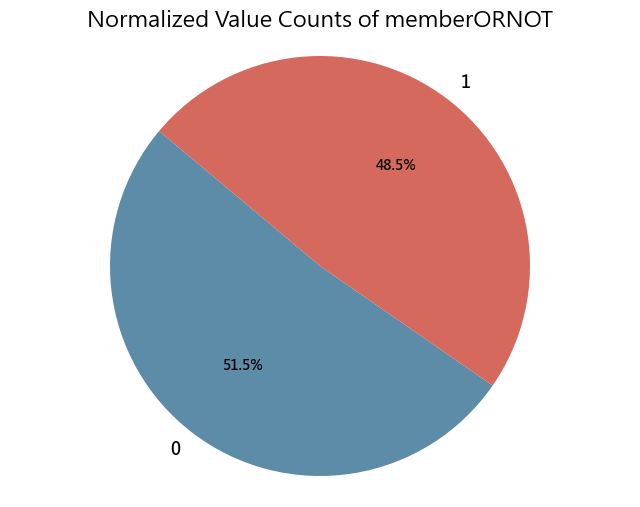

In [505]:
value_counts = pos_member['memberORNOT'].value_counts(normalize=True)
value_counts


plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=['#5d8ca8', '#d5695d'])
plt.title('Normalized Value Counts of memberORNOT')
plt.axis('equal')  
plt.show()

##### 消費頻率

In [507]:
# 從'結帳日期' 抓取年跟月的資訊
pos_member['Year'] = pos_member['結帳日期'].dt.year
pos_member['Month'] = pos_member['結帳日期'].dt.month

# 依年月分組並計算數量
pos_time_count = pos_member.groupby(['Year', 'Month']).size().reset_index(name='Count')
pos_time_count.head()

,Year,Month,Count
0,2021,1,2279
1,2021,2,2940
2,2021,3,6984
3,2021,4,4579
4,2021,5,2861


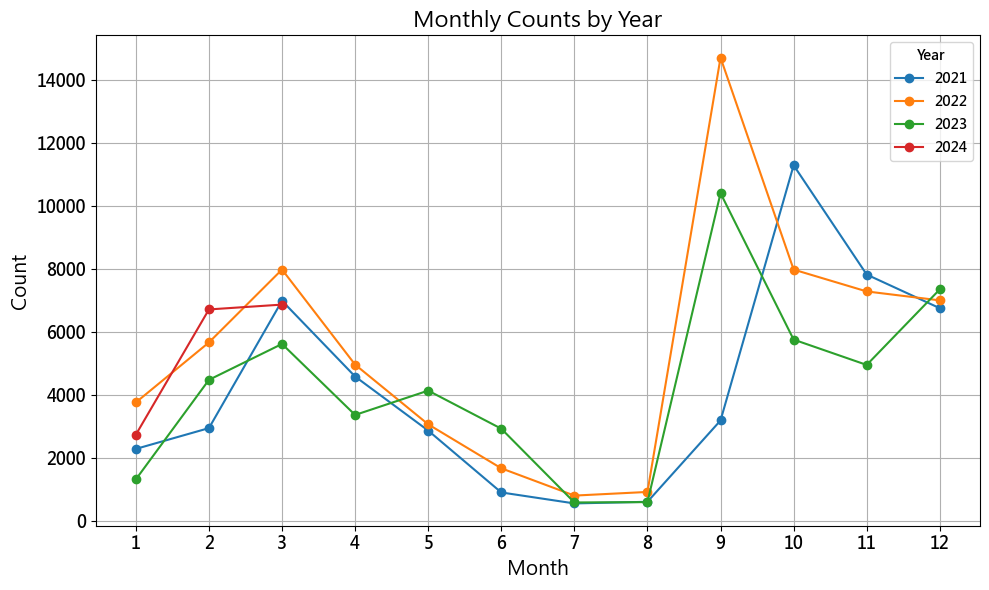

In [568]:
# 按年份分組資料
grouped = pos_time_count.groupby('Year')

# 繪製每個年份的資料
plt.figure(figsize=(10, 6)) 
for year, group in grouped:  
    plt.plot(group['Month'], group['Count'], label=str(year), marker='o')

plt.title('Monthly Counts by Year')  
plt.xlabel('Month')  
plt.ylabel('Count')  
plt.xticks(range(1, 13))  
plt.legend(title='Year', loc='upper right') 
plt.grid(True)  
plt.tight_layout()  
plt.show()  


##### 消費總額

In [511]:
# 按年份分組資料
pos_time_sum = pos_member.groupby(['Year', 'Month'])['實際銷售小計'].sum().reset_index()
pos_time_sum.head()

,Year,Month,實際銷售小計
0,2021,1,434775
1,2021,2,973792
2,2021,3,2408516
3,2021,4,822491
4,2021,5,587242


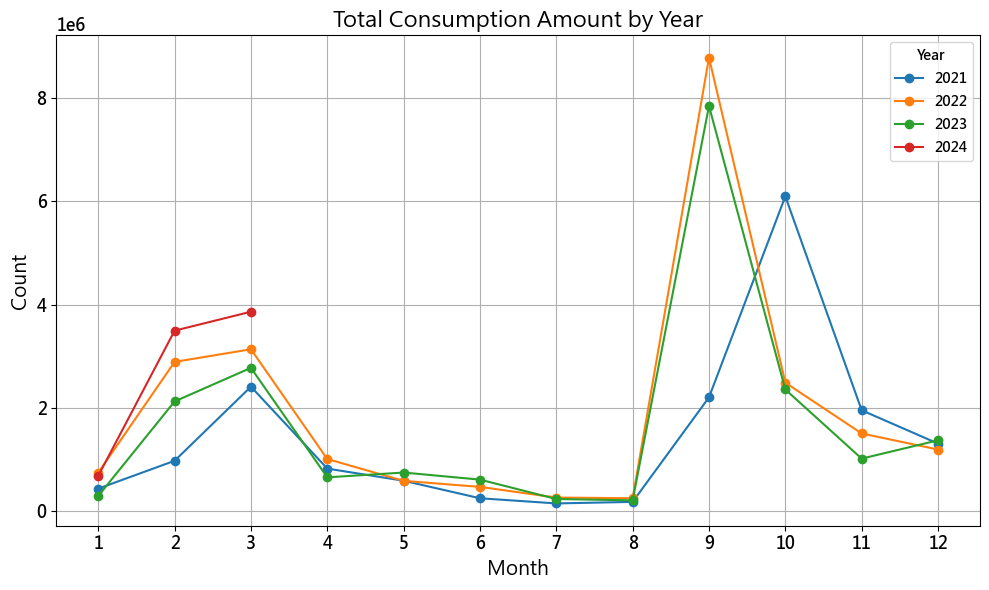

In [569]:
# 按年份分組資料
grouped = pos_time_sum.groupby('Year')

# 繪製每個年份的資料
plt.figure(figsize=(10, 6))
for year, group in grouped:
    plt.plot(group['Month'], group['實際銷售小計'], label=str(year),marker='o')

plt.title('Total Consumption Amount by Year')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(1, 13))
plt.legend(title='Year', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 會員平均有幾次消費會使用紅利折抵或禮券

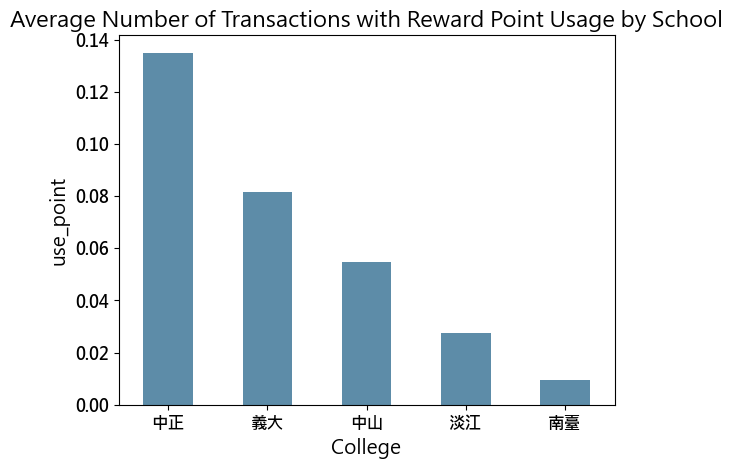

In [535]:
# 各校會員平均有幾次消費會使用紅利折抵
pos_point_school=pos_member[pos_member['memberORNOT']==1].groupby(['倉別名稱','UserID'])['use_point'].mean().reset_index()
pos_point_school=pos_point_school.groupby('倉別名稱')['use_point'].mean().reset_index()
pos_point_school=pos_point_school.sort_values(by='use_point', ascending=False)

ax = pos_point_school.plot(kind='bar', x='倉別名稱', y='use_point', legend=None, color='#5d8ca8')
plt.xlabel('College')
plt.ylabel('use_point')
plt.title('Average Number of Transactions with Reward Point Usage by School')
ax.set_xticklabels(pos_point_school['倉別名稱'], rotation=0)

plt.show()


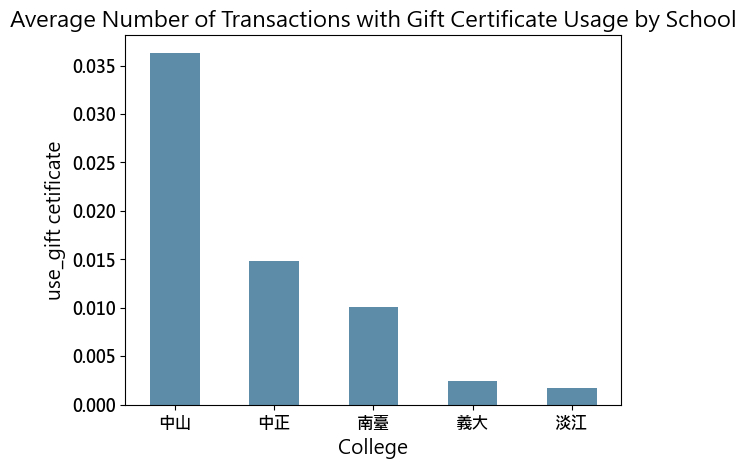

In [531]:
# 各校會員平均有幾次消費會使用禮卷折抵
pos_coupon_school=pos_member[pos_member['memberORNOT']==1].groupby(['倉別名稱','UserID'])['use_giftcerti'].mean().reset_index()
pos_coupon_school=pos_coupon_school.groupby('倉別名稱')['use_giftcerti'].mean().reset_index()
pos_coupon_school=pos_coupon_school.sort_values(by='use_giftcerti', ascending=False)

ax = pos_coupon_school.plot(kind='bar', x='倉別名稱', y='use_giftcerti', legend=None, color='#5d8ca8')
plt.xlabel('College')
plt.ylabel('use_gift cetificate')
plt.title('Average Number of Transactions with Gift Certificate Usage by School')
ax.set_xticklabels(pos_coupon_school['倉別名稱'], rotation=0)
plt.show()

##### 各年齡會員，平均每人消費使用紅利折抵頻率
- 將年齡限縮於18-30

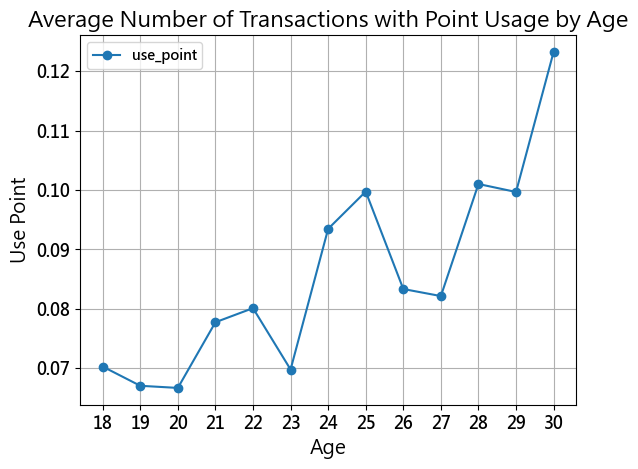

In [545]:
# 各年齡會員，平均每人消費使用紅利折抵頻率
pos_age_point=pos_member[pos_member['memberORNOT']==1].groupby(['UserID','age'])['use_point'].mean().reset_index()
pos_age_point=pos_age_point.groupby("age")['use_point'].mean().reset_index()
pos_age_point=pos_age_point[ (pos_age_point["age"]>=18) & (pos_age_point["age"]<=30)]


pos_age_point.plot(kind='line', x='age', y='use_point', marker='o')
plt.xlabel('Age')
plt.ylabel('Use Point')
plt.title('Average Number of Transactions with Point Usage by Age')
plt.xticks(pos_age_point['age'])  
plt.grid(True)
plt.show()

##### 會員消費頻率與兌換券的兌換次數關係

In [542]:
# 會員平均一年消費次數與兌換券的兌換次數
pos_coupon_freq=pos_member[pos_member['memberORNOT']==1].groupby(['UserID','Year']).size().reset_index(name="count")
pos_coupon_freq=pos_coupon_freq.groupby(['UserID'])['count'].mean().reset_index()
pos_coupon_freq=pd.merge(pos_coupon_freq, member_coupon_count[['UserID','count']], on='UserID', how='left')
pos_coupon_freq = pos_coupon_freq.rename(columns={'count_x': 'visit_perYear','count_y': 'coupon_count'})
pos_coupon_freq.head()

,UserID,visit_perYear,coupon_count
0,900002568,3.666667,NaN
1,900008283,5.000000,1.0
2,900009691,3.000000,NaN
3,900011046,6.000000,NaN
4,900020718,1.500000,NaN


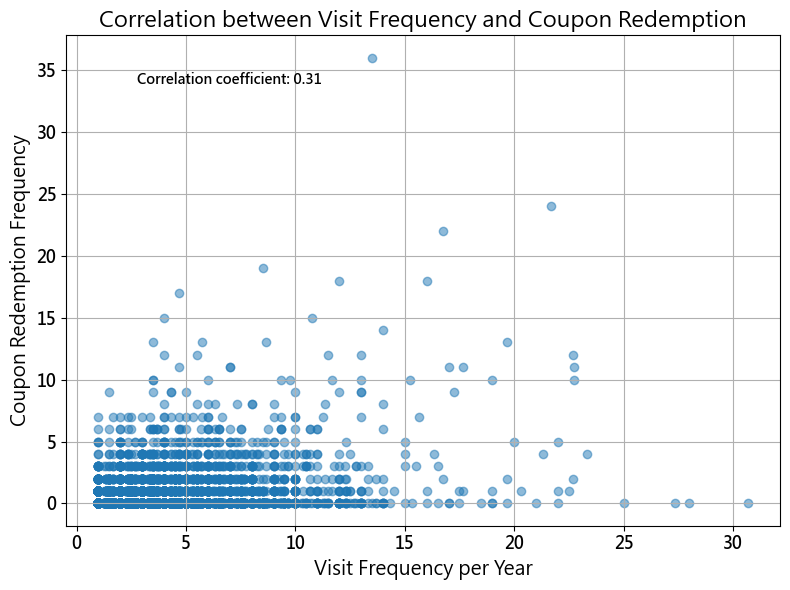

In [552]:
# 將欄位 'coupon_count' 的空值填入 0
pos_coupon_freq['coupon_count'] = pos_coupon_freq['coupon_count'].fillna(0)

# 計算 Pearson 相關係數
correlation = pos_coupon_freq['visit_perYear'].corr(pos_coupon_freq['coupon_count'])

# 使用散點圖視覺化消費頻率與兌換頻率間的關係
plt.figure(figsize=(8, 6))
plt.scatter(pos_coupon_freq['visit_perYear'], pos_coupon_freq['coupon_count'], alpha=0.5)
plt.title('Correlation between Visit Frequency and Coupon Redemption')
plt.xlabel('Visit Frequency per Year')
plt.ylabel('Coupon Redemption Frequency')
plt.grid(True)
plt.tight_layout()

# 在圖上添加相關係數標示
plt.text(0.1, 0.9, f'Correlation coefficient: {correlation:.2f}', transform=plt.gca().transAxes)
plt.show()


##### 會員消費金額與兌換券的兌換次數關係

In [551]:
# 每位會員平均每年消費總額
pos_coupon_sum=pos_member[pos_member['memberORNOT']==1].groupby(['UserID','Year'])['實際銷售小計'].sum().reset_index()
pos_coupon_sum=pos_coupon_sum.groupby('UserID')['實際銷售小計'].mean().reset_index()
pos_coupon_sum=pd.merge(pos_coupon_sum, member_coupon_count[['UserID','count']], on='UserID', how='left')
pos_coupon_sum['count'] = pos_coupon_sum['count'].fillna(0)
pos_coupon_sum.head()


,UserID,實際銷售小計,count
0,900002568,590.666667,0.0
1,900008283,367.000000,1.0
2,900009691,1361.500000,0.0
3,900011046,779.000000,0.0
4,900020718,1120.500000,0.0


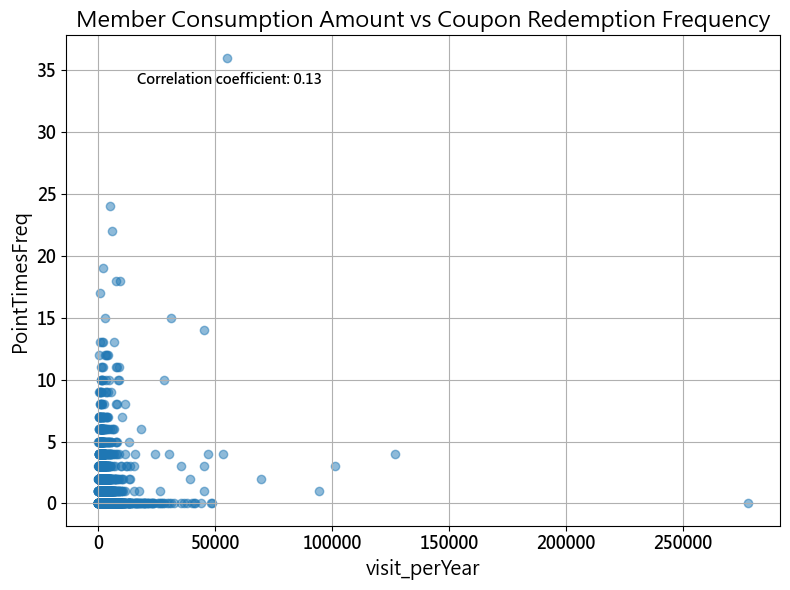

In [571]:
# 計算 Pearson 相關係數
correlation = pos_coupon_sum['實際銷售小計'].corr(pos_coupon_sum['count'])

# 使用散點圖視覺化消費金額與兌換頻率間的關係
plt.figure(figsize=(8, 6))
plt.scatter(pos_coupon_sum['實際銷售小計'], pos_coupon_sum['count'], alpha=0.5)
plt.title("Member Consumption Amount vs Coupon Redemption Frequency")
plt.xlabel('visit_perYear')
plt.ylabel('PointTimesFreq')
plt.grid(True)
plt.tight_layout()

# 在圖上添加相關係數標示
plt.text(0.1, 0.9, f'Correlation coefficient: {correlation:.2f}', transform=plt.gca().transAxes)
plt.show()


##### 會員每年平均消費頻率與每年平均紅利領取頻率關係

In [570]:
# 會員平均一年領取幾次紅利
member_point_freq=point.groupby(["UserID",'Year']).size().reset_index(name="PointTimesFreq")
member_point_freq=member_point_freq.groupby('UserID')['PointTimesFreq'].mean().reset_index()
member_point_freq.head()

,UserID,PointTimesFreq
0,900001023,2.0
1,900002271,2.0
2,900008283,6.5
3,900009691,5.5
4,900011046,5.5


In [572]:
# 會員平均一年領取幾點紅利
member_point_sum=point.groupby(["UserID",'Year'])['Point'].sum().reset_index()
member_point_sum=member_point_sum.groupby('UserID')['Point'].mean().reset_index()
member_point_sum

,UserID,Point
0,900001023,898.0
1,900002271,60.0
2,900008283,3575.0
3,900009691,105.0
4,900011046,31.0
...,...,...
18671,989985917,4023.0
18672,989986908,10.0
18673,989991647,1530.0
18674,989993202,3.0


In [573]:
# 會員平均一年消費次數 VS 紅利領取頻率/點數
pos_point_freq=pos_member[pos_member['memberORNOT']==1].groupby(['UserID','Year']).size().reset_index(name="visit_perYear")
pos_point_freq=pos_point_freq.groupby(['UserID'])['visit_perYear'].mean().reset_index()
pos_point_freq=pd.merge(pos_point_freq, member_point_freq[['UserID','PointTimesFreq']], on='UserID', how='left')
pos_point_freq=pd.merge(pos_point_freq, member_point_sum[['UserID','Point']], on='UserID', how='left')
pos_point_freq

,UserID,visit_perYear,PointTimesFreq,Point
0,900002568,3.666667,NaN,NaN
1,900008283,5.000000,6.500000,3575.000000
2,900009691,3.000000,5.500000,105.000000
3,900011046,6.000000,5.500000,31.000000
4,900020718,1.500000,5.000000,94.666667
...,...,...,...,...
14848,989984332,2.000000,1.000000,3.000000
14849,989985917,6.000000,10.666667,4023.000000
14850,989986908,1.666667,2.000000,10.000000
14851,989991647,3.000000,4.500000,1530.000000


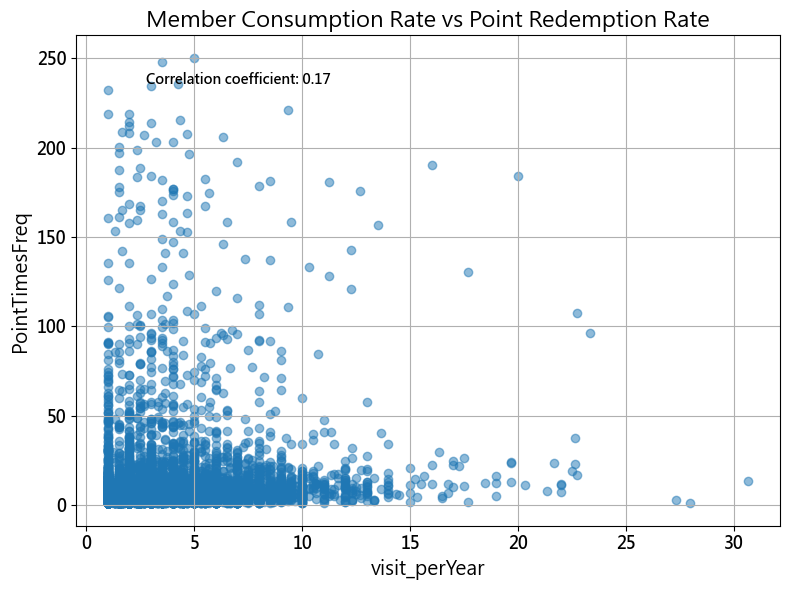

In [575]:
# 計算 Pearson 相關係數
correlation = pos_point_freq['visit_perYear'].corr(pos_point_freq['PointTimesFreq'])

# 使用散點圖視覺化消費頻率與紅利領取頻率間的關係
plt.figure(figsize=(8, 6))
plt.scatter(pos_point_freq['visit_perYear'], pos_point_freq['PointTimesFreq'], alpha=0.5)
plt.title('Member Consumption Rate vs Point Redemption Rate')
plt.xlabel('visit_perYear')
plt.ylabel('PointTimesFreq')
plt.grid(True)
plt.tight_layout()

# 在圖上添加相關係數標示
plt.text(0.1, 0.9, f'Correlation coefficient: {correlation:.2f}', transform=plt.gca().transAxes)
plt.show()